<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-libraries-and-data.-Initial-description-of-data" data-toc-modified-id="Importing libraries and data. Initial description of data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing libraries and data. Initial description of data</a></span></li>
<li><span><a href="#Plotting-null-values-and-cleansing-the-data" data-toc-modified-id="Plotting-null-values-and-cleansing-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting null values and cleansing the data</a></span></li>
<li><span><a href="#Further-data-exploration" data-toc-modified-id="Further-data-exploration"><span class="toc-item-num">3&nbsp;&nbsp;</span>Further data exploration</a></span></li>
<li><span><a href="#Splitting-the-data-into-3-datasets-and-comparison" data-toc-modified-id="Splitting-the-data-into-3-datasets-and-comparison"><span class="toc-item-num">4&nbsp;&nbsp;</span>Splitting the data into 3 datasets and comparison</a></span></li>
<li><span><a href="#Applying-different-ML-techniques-to-the-3-datasets" data-toc-modified-id="Applying-different-ML-techniques-to-the-3-datasets"><span class="toc-item-num">5&nbsp;&nbsp;</span>Applying different ML techniques to the 3 datasets</a></span></li>
<li><span><a href="#Comparison-of-different-modelling-techniques-on-different-datasets" data-toc-modified-id="Comparison-of-different-modelling-techniques-on-different-datasets"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comparison of different modelling techniques on different datasets</a></span></li>
</ul></div>

# Importing libraries and data. Initial description of data

In [1]:
import os
import kaggle
from zipfile import ZipFile
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import sklearn.linear_model as skl_lm
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from pandas.plotting import scatter_matrix
import datetime as dt
import random
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
import tensorflow
from numpy.random import seed
from IPython.display import display
from wordcloud import WordCloud
import datetime

Using TensorFlow backend.


In [2]:
os.chdir('D:\\NCI\\Term2 - Data Mining & Machine Learning 1\\Project\\data')

The line below could be used to download data automatically for open competitions (after downloading kaggle's token), unfortunately this is not the case so the data has to be downloaded manually

!kaggle competitions download -c ashrae-energy-prediction

In [3]:
raw_file = "ashrae-energy-prediction.zip"
with ZipFile(raw_file, 'r') as zip: 
    zip.printdir()

File Name                                             Modified             Size
building_metadata.csv                          2019-10-10 17:20:04        45527
sample_submission.csv                          2019-10-10 17:20:12    447562511
test.csv                                       2019-10-10 17:20:46   1462461085
train.csv                                      2019-10-10 17:22:42    678616640
weather_test.csv                               2019-10-10 17:23:40     14787908
weather_train.csv                              2019-10-10 17:23:42      7450075


In [4]:
zf = ZipFile(raw_file,'r')

In [5]:
df_building_metadata = pd.read_csv(zf.open('building_metadata.csv'))
print(df_building_metadata)
df_building_metadata.info()
df_building_metadata.describe()

      site_id  building_id                    primary_use  square_feet  \
0           0            0                      Education         7432   
1           0            1                      Education         2720   
2           0            2                      Education         5376   
3           0            3                      Education        23685   
4           0            4                      Education       116607   
...       ...          ...                            ...          ...   
1444       15         1444  Entertainment/public assembly        19619   
1445       15         1445                      Education         4298   
1446       15         1446  Entertainment/public assembly        11265   
1447       15         1447            Lodging/residential        29775   
1448       15         1448                         Office        92271   

      year_built  floor_count  
0         2008.0          NaN  
1         2004.0          NaN  
2         1991.

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


some missing values in building metadata

In [6]:
df_train = pd.read_csv(zf.open('train.csv'))
print(df_train)
df_train.info()
df_train.describe()

          building_id  meter            timestamp  meter_reading
0                   0      0  2016-01-01 00:00:00          0.000
1                   1      0  2016-01-01 00:00:00          0.000
2                   2      0  2016-01-01 00:00:00          0.000
3                   3      0  2016-01-01 00:00:00          0.000
4                   4      0  2016-01-01 00:00:00          0.000
...               ...    ...                  ...            ...
20216095         1444      0  2016-12-31 23:00:00          8.750
20216096         1445      0  2016-12-31 23:00:00          4.825
20216097         1446      0  2016-12-31 23:00:00          0.000
20216098         1447      0  2016-12-31 23:00:00        159.575
20216099         1448      0  2016-12-31 23:00:00          2.850

[20216100 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int64
meter            int64
timestamp        object
meter_r

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


train dataset looks good

In [7]:
df_weather_train = pd.read_csv(zf.open('weather_train.csv'))
print(df_weather_train)
df_weather_train.info()
df_weather_train.describe()

        site_id            timestamp  air_temperature  cloud_coverage  \
0             0  2016-01-01 00:00:00             25.0             6.0   
1             0  2016-01-01 01:00:00             24.4             NaN   
2             0  2016-01-01 02:00:00             22.8             2.0   
3             0  2016-01-01 03:00:00             21.1             2.0   
4             0  2016-01-01 04:00:00             20.0             2.0   
...         ...                  ...              ...             ...   
139768       15  2016-12-31 19:00:00              3.0             NaN   
139769       15  2016-12-31 20:00:00              2.8             2.0   
139770       15  2016-12-31 21:00:00              2.8             NaN   
139771       15  2016-12-31 22:00:00              2.2             NaN   
139772       15  2016-12-31 23:00:00              1.7             NaN   

        dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0                  20.0                NaN              1

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


weather data frame has missing values as well
Still some of the non-categorical columns are stored as object datatypes, so first emptying memory and then cleaning them up as well

In [8]:
del raw_file, zf
gc.collect()

42

In [9]:
df_weather_train['timestamp']=pd.to_datetime(df_weather_train["timestamp"], format='%Y-%m-%d %H:%M:%S')
df_train['timestamp']=pd.to_datetime(df_train["timestamp"], format='%Y-%m-%d %H:%M:%S')

In [10]:
print(df_weather_train)
df_weather_train.info()
df_weather_train.describe()

        site_id           timestamp  air_temperature  cloud_coverage  \
0             0 2016-01-01 00:00:00             25.0             6.0   
1             0 2016-01-01 01:00:00             24.4             NaN   
2             0 2016-01-01 02:00:00             22.8             2.0   
3             0 2016-01-01 03:00:00             21.1             2.0   
4             0 2016-01-01 04:00:00             20.0             2.0   
...         ...                 ...              ...             ...   
139768       15 2016-12-31 19:00:00              3.0             NaN   
139769       15 2016-12-31 20:00:00              2.8             2.0   
139770       15 2016-12-31 21:00:00              2.8             NaN   
139771       15 2016-12-31 22:00:00              2.2             NaN   
139772       15 2016-12-31 23:00:00              1.7             NaN   

        dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0                  20.0                NaN              1019.7   
1  

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


# Plotting null values and cleansing the data

<a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents"><span class="toc-item-num">Jump back to <b>Table of Contents</b></a></span></li>

it looks like the data is ordered correctly, but before cleansing, since we're dealing with time series, it's better to make sure it's ordered chronologically and by site id

In [11]:
df_weather_train.sort_values(["site_id", "timestamp"], inplace = True)

plot of missing weather values 

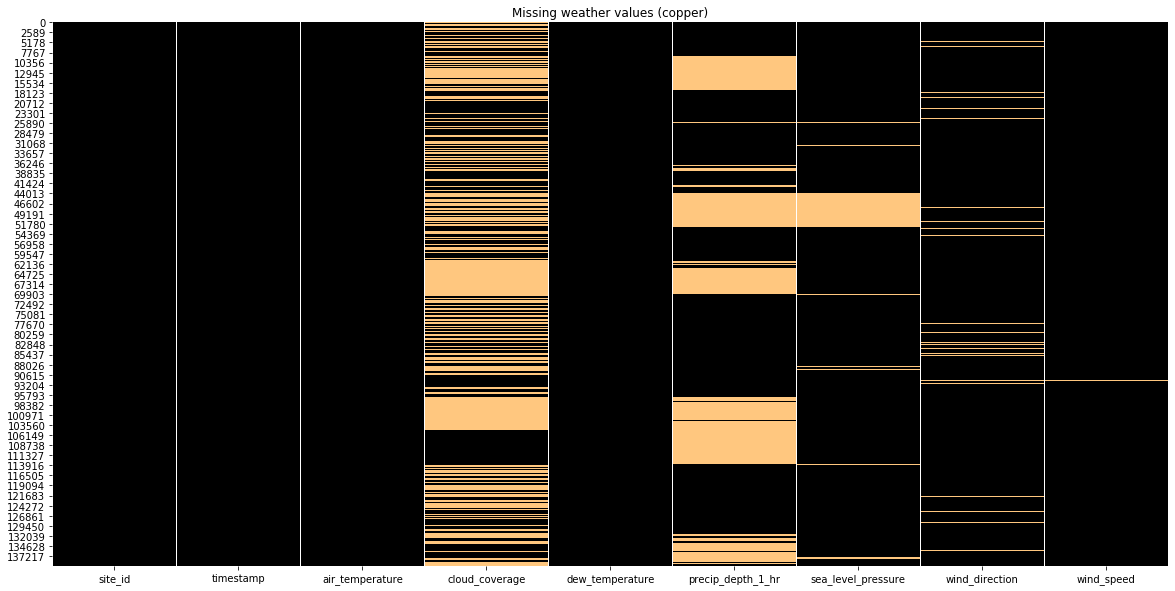

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_weather_train.isnull(), cmap = "copper", cbar = False)
plt.title("Missing weather values (copper)");

Starting cleansing by aggregating weather data daily and monthly and assign the closest interval to the missing data (assumption: there are no rapid changes in weather) which should give the best results

In [13]:
df_weather_train['date_day'] = pd.to_datetime(df_weather_train['timestamp']).dt.strftime('%Y-%m-%d')

In [14]:
na_columns=['air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr','sea_level_pressure','wind_direction', 'wind_speed']
df_weather_train[na_columns] = df_weather_train.groupby(['site_id', 'date_day'])[na_columns].transform(lambda x: x.ffill().bfill())

let's plot it again to check NAs

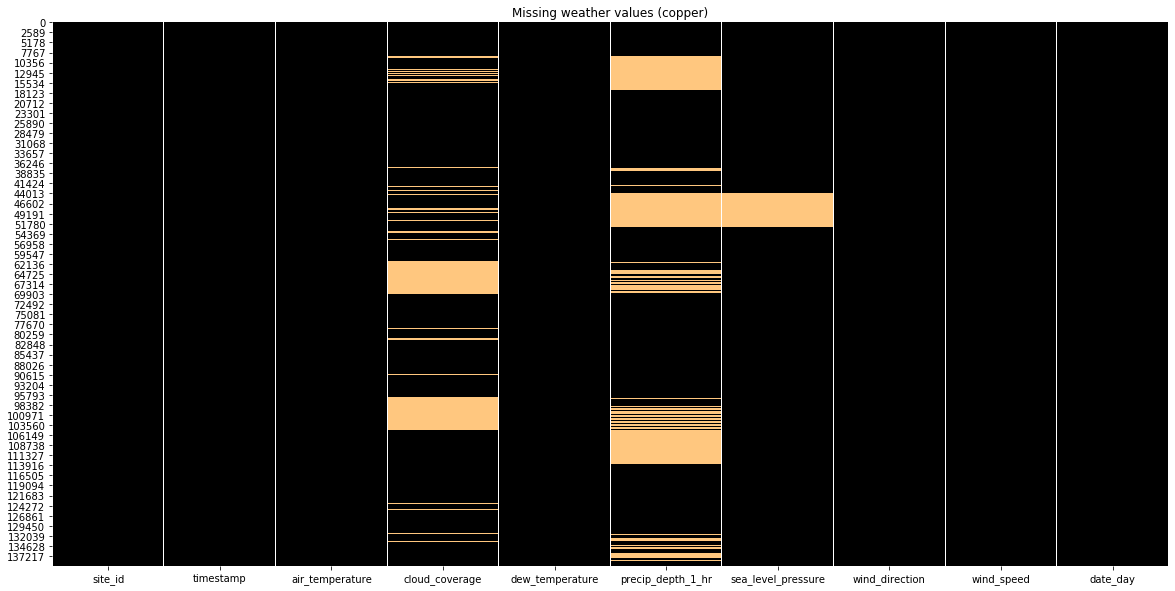

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_weather_train.isnull(), cmap = "copper", cbar = False)
plt.title("Missing weather values (copper)");

still looks like some missing values so now let's use month to aggregate

In [16]:
df_weather_train['date_mth'] = pd.to_datetime(df_weather_train['timestamp']).dt.strftime('%Y-%m')

In [17]:
na_columns=['air_temperature', 'cloud_coverage', 'dew_temperature', 'precip_depth_1_hr','sea_level_pressure','wind_direction', 'wind_speed']
df_weather_train[na_columns] = df_weather_train.groupby(['site_id', 'date_mth'])[na_columns].transform(lambda x: x.ffill().bfill())

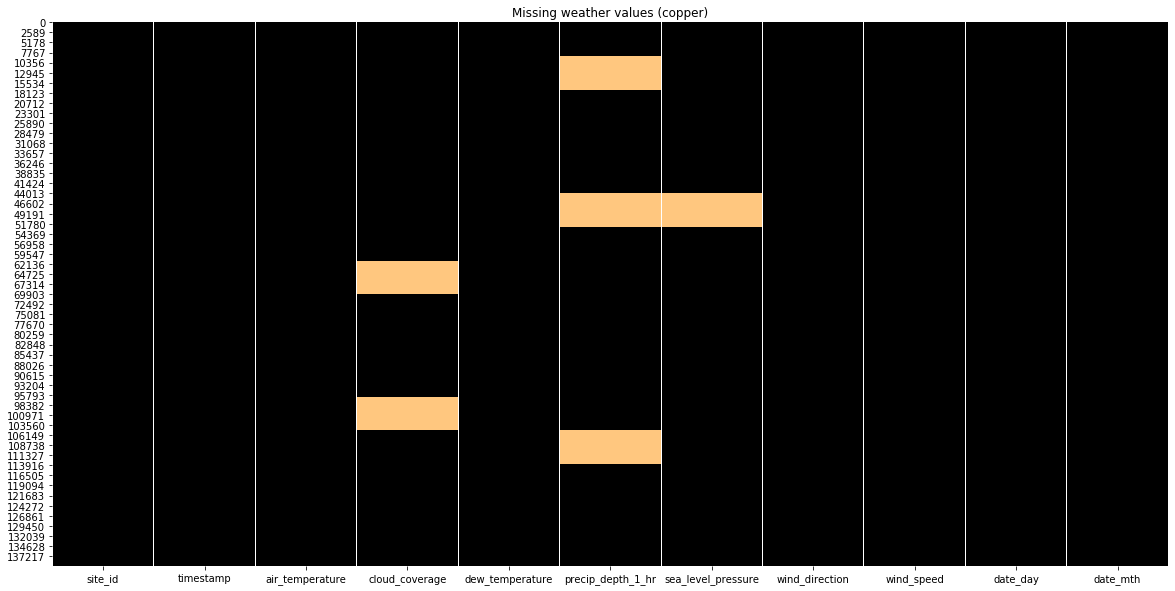

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_weather_train.isnull(), cmap = "copper", cbar = False)
plt.title("Missing weather values (copper)");

we're still missing some values, so let's drop NAs since we won't be able to establish whether these features are relevant to our model

In [19]:
df_weather_train = df_weather_train.dropna()

and then we repeat the whole process also for buildings

In [20]:
df_building_metadata.sort_values(["site_id", "building_id"], inplace = True)

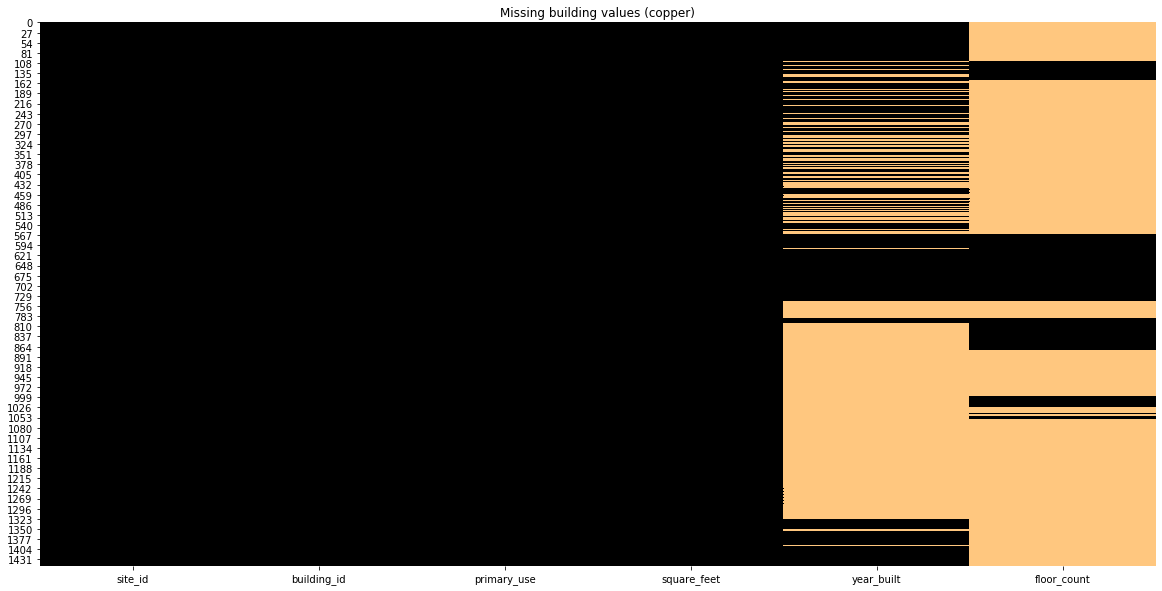

In [21]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_building_metadata.isnull(), cmap = "copper", cbar = False)
plt.title("Missing building values (copper)");

In [22]:
na_columns=['year_built', 'floor_count']
df_building_metadata[na_columns] = df_building_metadata.groupby(['primary_use'])[na_columns].transform(lambda x: x.ffill().bfill())

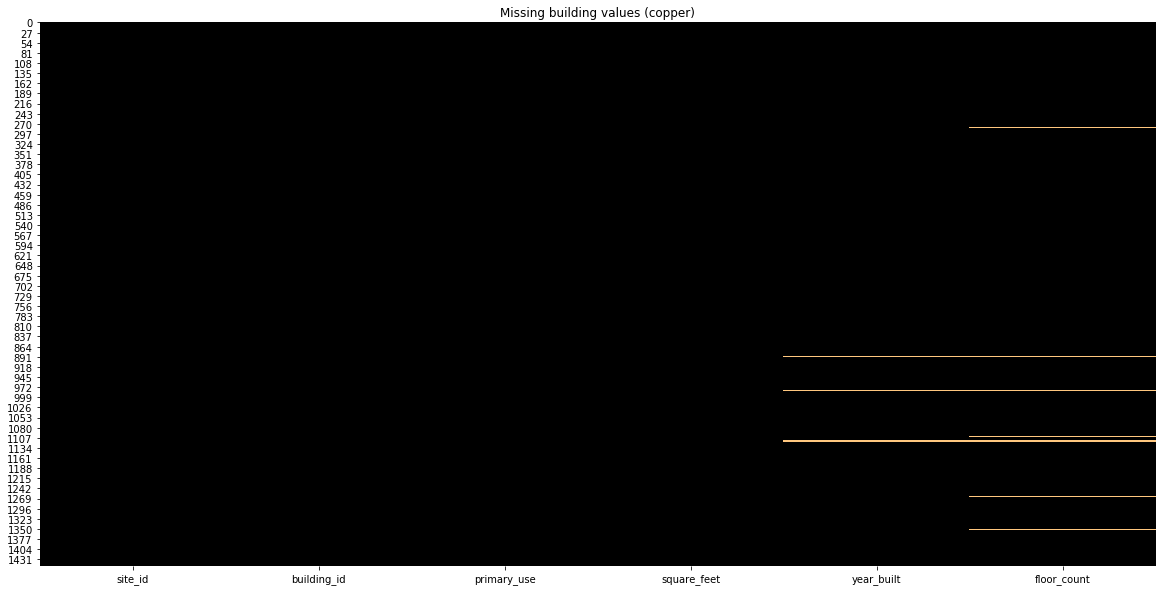

In [23]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_building_metadata.isnull(), cmap = "copper", cbar = False)
plt.title("Missing building values (copper)");

In [24]:
df_building_metadata = df_building_metadata.dropna()

Since the data types in raw files are not optimal I'll reduce amount of memory consumed
https://gist.github.com/eherrerosj/fdac2b3761a10332da163b1c90367890 (it couldn't be done at earlier stage, since groupby function doesn't work on float16)

In [25]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [26]:
df_building_metadata = reduce_mem_usage(df_building_metadata)
df_weather_train = reduce_mem_usage(df_weather_train)
df_train = reduce_mem_usage(df_train)
gc.collect()

Mem. usage decreased to  0.04 Mb (51.8% reduction)
Mem. usage decreased to  4.32 Mb (51.0% reduction)
Mem. usage decreased to 289.19 Mb (53.1% reduction)


20281

# Further data exploration

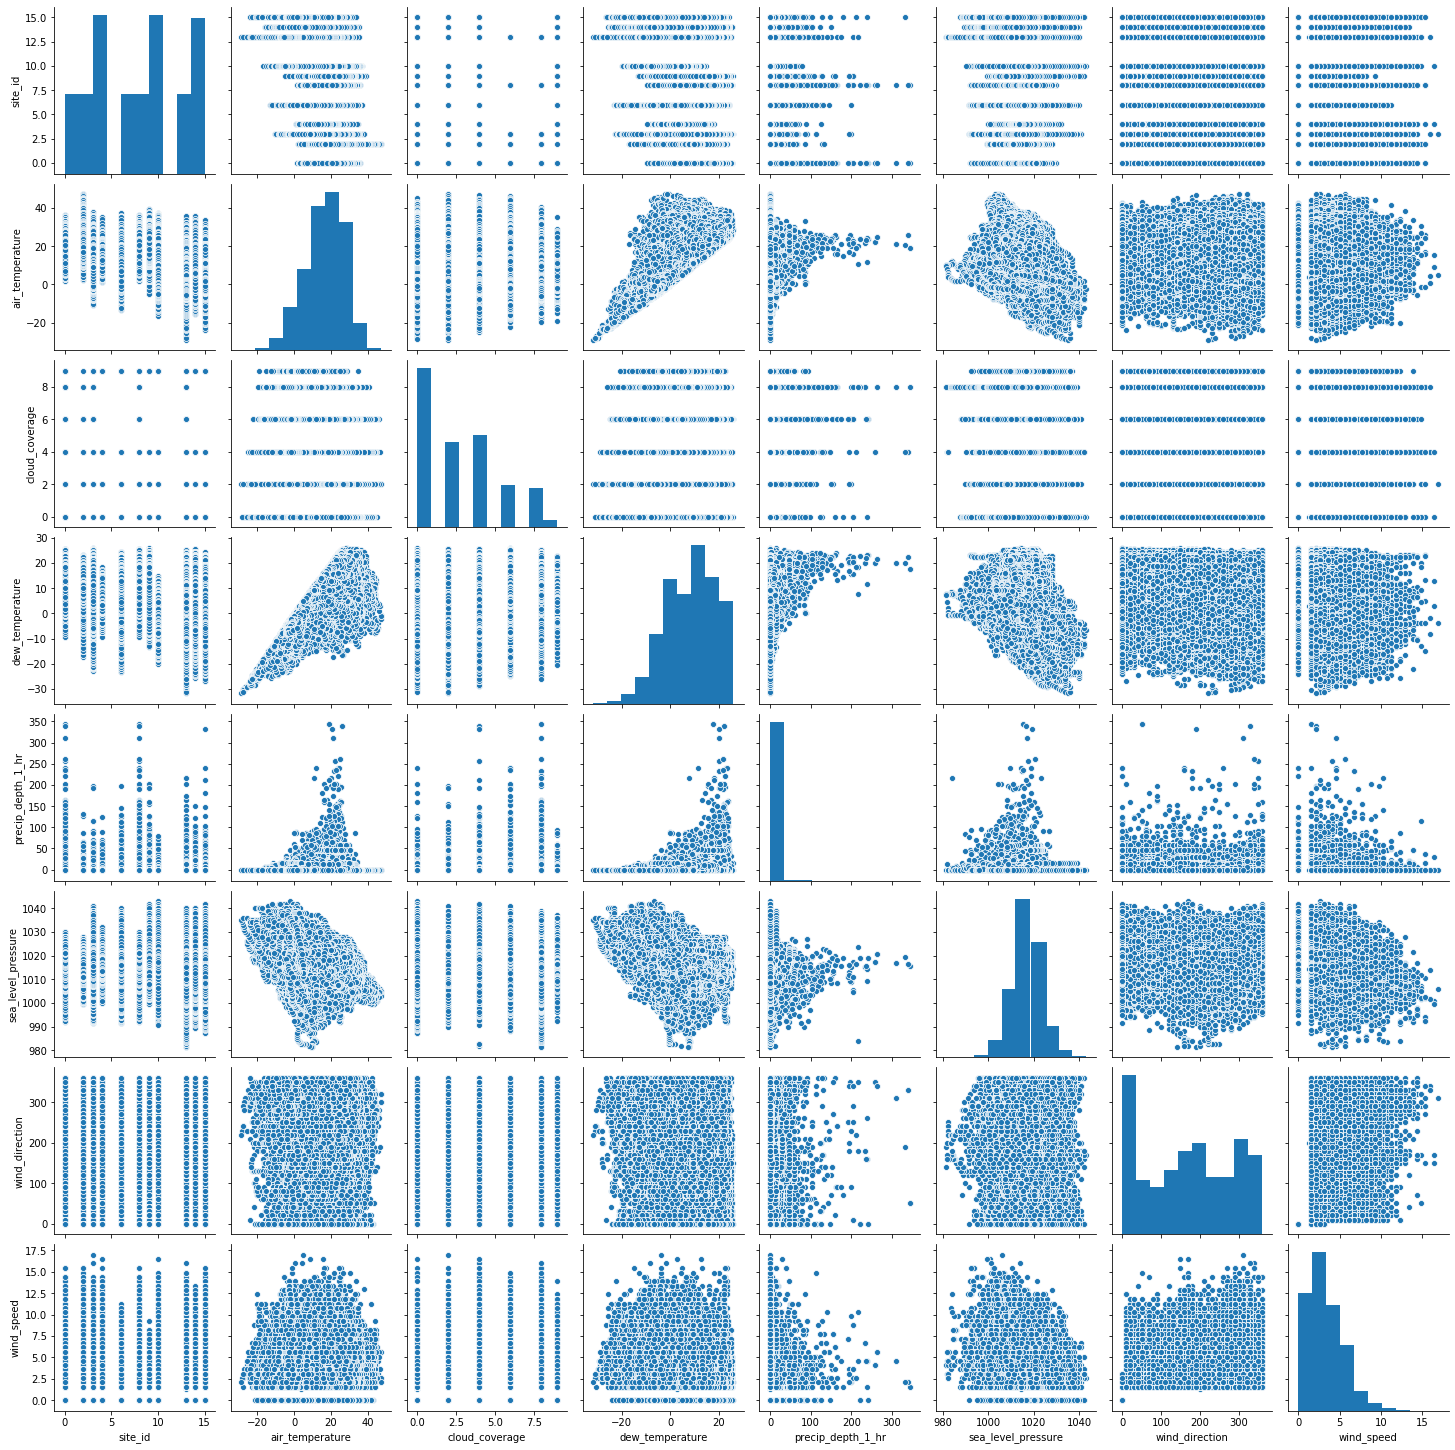

In [27]:
sns.pairplot(df_weather_train)

there are very few linear relationships between pairs of weather variables (with exception of air/dew temperature, which is expected). We'll have a look at correlations with other variables after merging the dataset

In [28]:
df_train = df_train.merge(df_building_metadata, on='building_id', how='left')
df_train = df_train.merge(df_weather_train, on=['site_id', 'timestamp'], how='left')

In [29]:
del df_building_metadata, df_weather_train
gc.collect()

100

let's have a look at buildings and meters

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

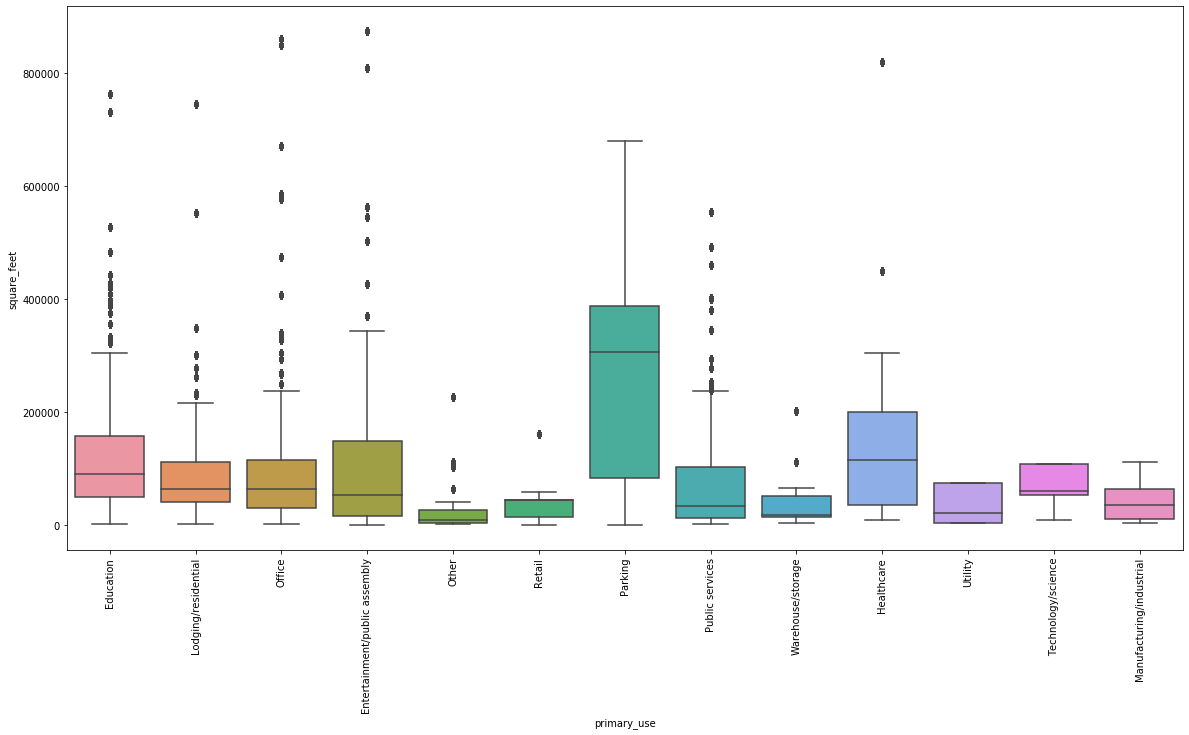

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='primary_use', y='square_feet', data=df_train)
plt.xticks(rotation=90)

Some building types are using only certain types of meters. The meter readings of some building types varies significantly from other building types

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

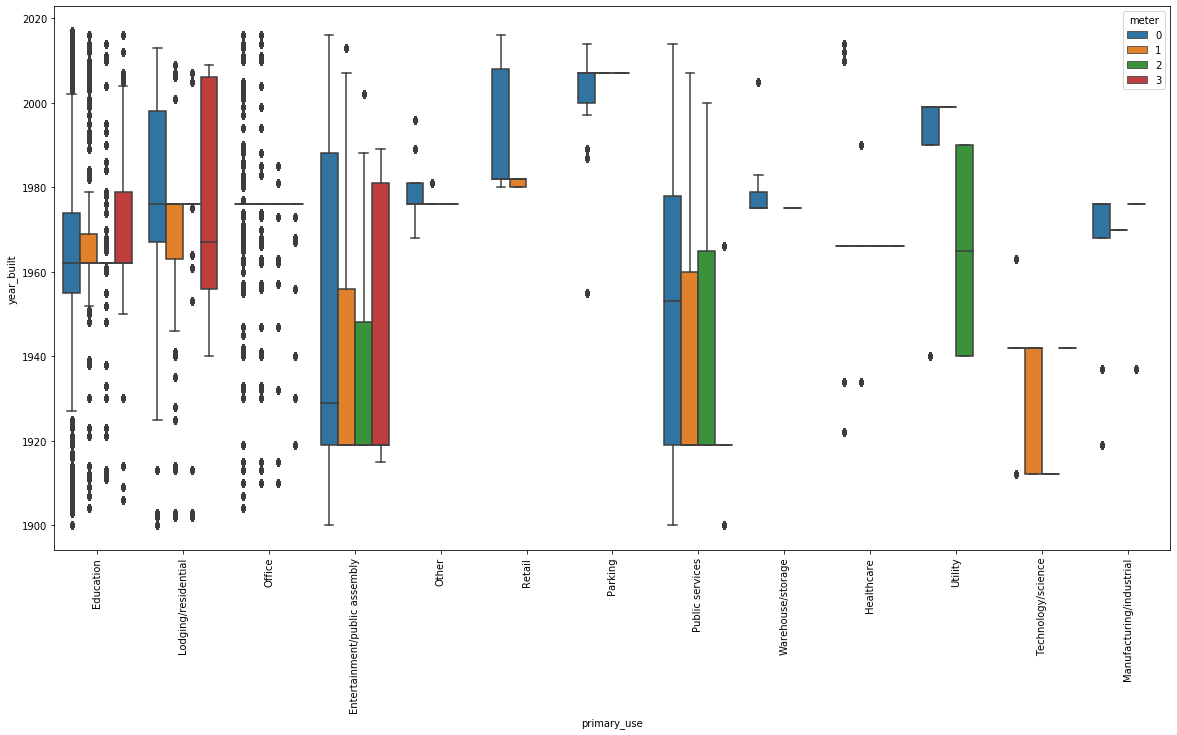

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='primary_use', y='year_built', hue='meter', data=df_train)
plt.xticks(rotation=90)

Some building types have significant inter quartile range e.g. Entertainment or Public Services, while other types are more homogenous e.g. Manufacturing.<br>
To measure impact of category of building type, categorical variables need to be converted - for this purpose let's use one hot encoding <br>
Since building_ids are location specific, I'll create categorical variables from building ID when we have datasets split by location<br>
https://pbpython.com/categorical-encoding.html

In [32]:
df_train = pd.get_dummies(df_train, columns=['primary_use'])

let's add some features, to measure synergy effect of combined:<br> <b>air_temperature</b> with <b>cloud_coverage</b> and <br><b>wind_direction</b> with <b>wind_speed</b>

In [33]:
df_train['syn_at_cc'] = df_train['air_temperature'] * df_train['cloud_coverage'] 
df_train['syn_wd_ws'] = df_train['wind_direction'] * df_train['wind_speed']

let's have a look at NAs again after merging data

In [34]:
df_train.info()
print (df_train.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 32 columns):
building_id                                  int16
meter                                        int8
timestamp                                    datetime64[ns]
meter_reading                                float32
site_id                                      float64
square_feet                                  float64
year_built                                   float16
floor_count                                  float16
air_temperature                              float16
cloud_coverage                               float16
dew_temperature                              float16
precip_depth_1_hr                            float16
sea_level_pressure                           float16
wind_direction                               float16
wind_speed                                   float16
date_day                                     object
date_mth                            

still some objects are taking a lot of memory probably their format changed during merging, or when new ones were created<br>let's re-run the function

In [35]:
df_train = df_train.dropna()
df_train = reduce_mem_usage(df_train)

gc.collect()

Mem. usage decreased to 1355.00 Mb (11.1% reduction)


80

Ok, no NAs. What about our future dependant variable's other values?

In [36]:
df_train.groupby(['meter_reading']).meter_reading.count()

meter_reading
0.000000e+00    1695137
1.000000e-04         45
2.000000e-04         33
3.000000e-04        411
4.000000e-04         51
                 ...   
2.184450e+07          1
2.184790e+07          1
2.187450e+07          1
2.188990e+07          1
2.190470e+07          1
Name: meter_reading, Length: 1622174, dtype: int64

Zeros will have impact on our model and in this case 0 doesn't mean there was no electicity consumption, it might mean as well that there was no meter reading so let's get rid of them before proceeding.

In [37]:
df_train = df_train[df_train.meter_reading != 0]

In [38]:
df_train.groupby(['meter']).meter.count() #{0: electricity, 1: chilledwater, 2: steam, 3: hotwater}

meter
0    9678894
1    3368576
2    2237297
3     780393
Name: meter, dtype: int64

In [39]:
gc.collect()

80

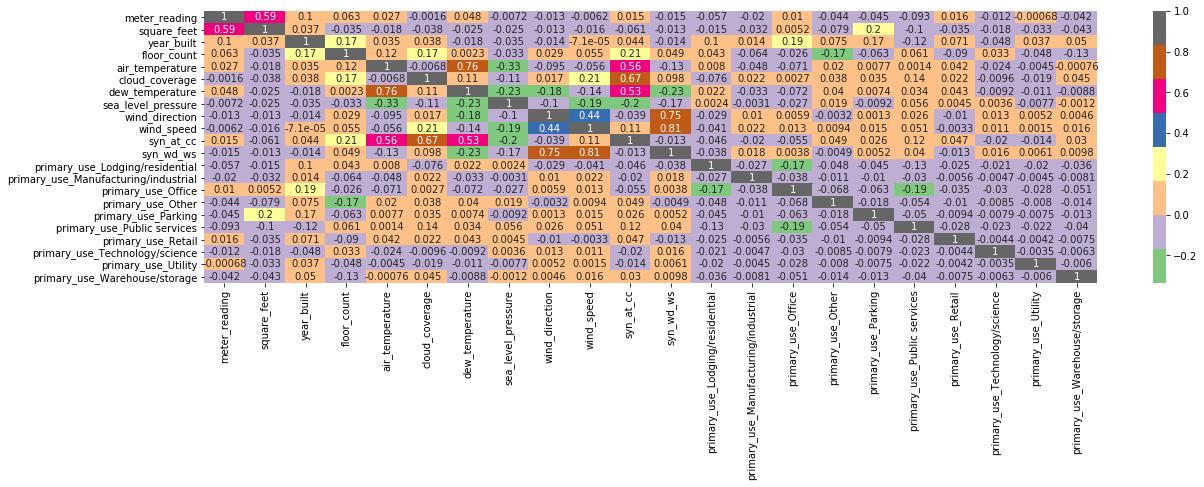

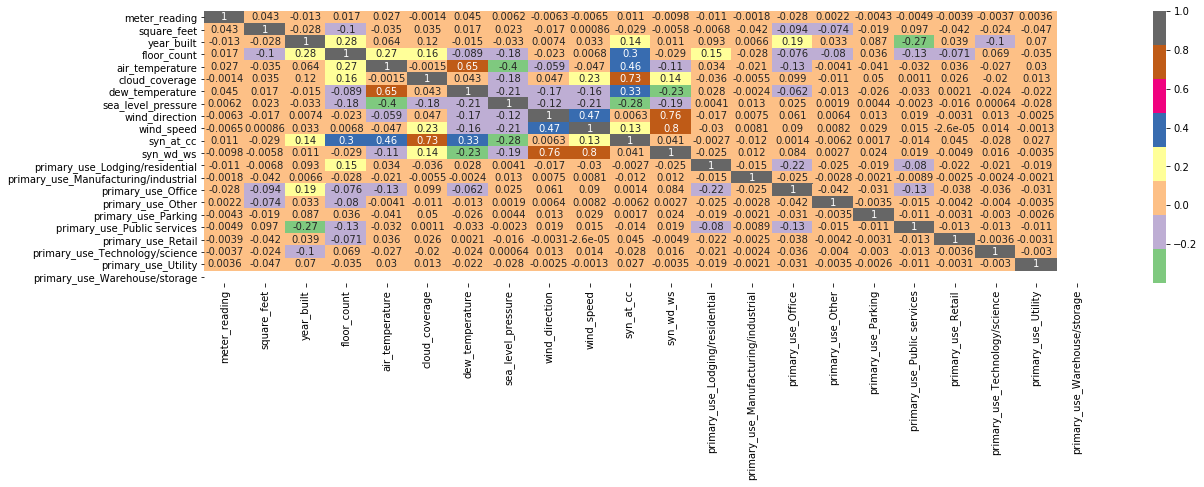

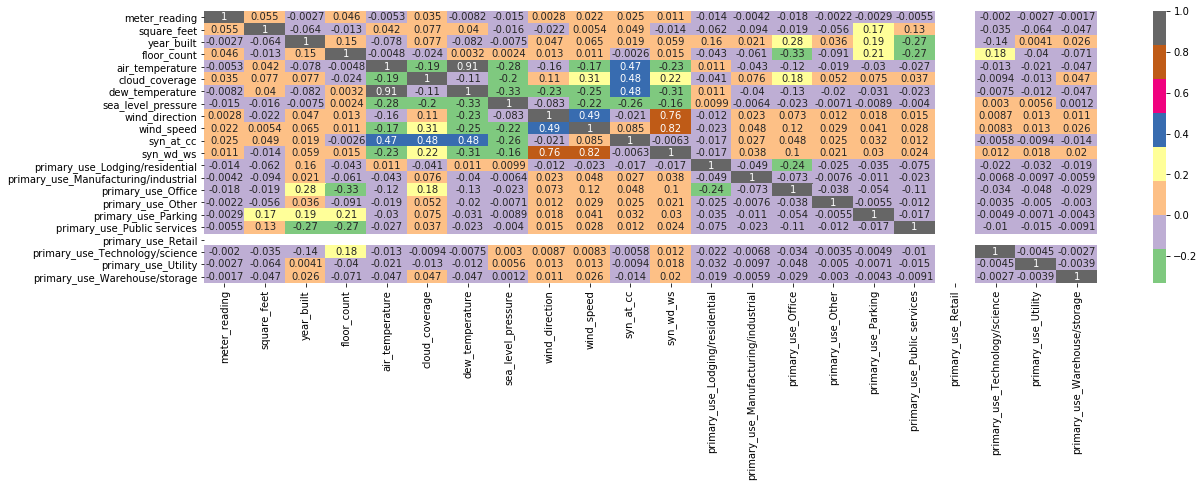

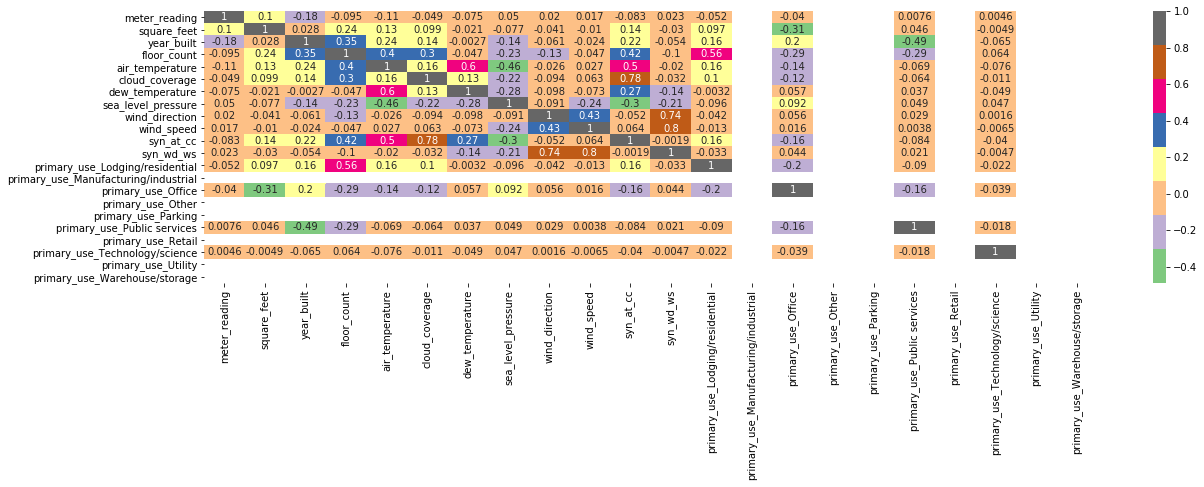

In [40]:
for m in range(0,4):
    matrix = df_train[df_train.meter == m][['meter_reading','square_feet','year_built','floor_count',
             'air_temperature','cloud_coverage','dew_temperature','sea_level_pressure','wind_direction',
             'wind_speed', 'syn_at_cc','syn_wd_ws', 'primary_use_Lodging/residential', 'primary_use_Manufacturing/industrial',
             'primary_use_Office', 'primary_use_Other', 'primary_use_Parking', 'primary_use_Public services', 'primary_use_Retail', 
             'primary_use_Technology/science', 'primary_use_Utility', 'primary_use_Warehouse/storage']].corr()
    f, ax = plt.subplots(figsize=(20, 5))
    sns.heatmap(matrix,annot=True,cmap="Accent")

we can see that certain independent variables have relatively strong correlation with meters' readings (e.g. square_feet and electricity meter) while others are mostly correlated with other independent variables.<br>
Since electricity meter has the most readings (almost 3 times as many as second biggest) and values across all features with some features relatively strongly correlated with it, the remainder analysis will focus only on it

In [41]:
df_train=df_train[df_train.meter==0]
print (df_train.isna().sum())#to make sure there are no NAs after selecting electricity meter only as this will impact the ability to run ML models
gc.collect()

building_id                                  0
meter                                        0
timestamp                                    0
meter_reading                                0
site_id                                      0
square_feet                                  0
year_built                                   0
floor_count                                  0
air_temperature                              0
cloud_coverage                               0
dew_temperature                              0
precip_depth_1_hr                            0
sea_level_pressure                           0
wind_direction                               0
wind_speed                                   0
date_day                                     0
date_mth                                     0
primary_use_Education                        0
primary_use_Entertainment/public assembly    0
primary_use_Healthcare                       0
primary_use_Lodging/residential              0
primary_use_M

84691

everything looks fine, we can finally move on to modelling

# Splitting the data into 3 datasets and comparison

<a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents"><span class="toc-item-num">Jump back to <b>Table of Contents</b></a></span></li>

let's have a look for which sites we have the most observations left after removing NANs.

In [42]:
df_train.groupby(['site_id']).site_id.count()

site_id
0.0      561983
2.0     1148852
3.0     2357139
4.0      742785
6.0      315322
8.0      541333
9.0      981128
10.0     236028
13.0    1172763
14.0     832711
15.0     788850
Name: site_id, dtype: int64

When we proceed to building our models based on this data I'm getting warnings so scaling the data to avoid issues.

it looks like sites 6, 8 and 10 have the least records, so selecting sample from them should be the most representative. <br>These will become the 3 dataset

In [43]:
df_all_data_site6=df_train[df_train.site_id==6].sample(n=10000, random_state=5)
df_all_data_site8=df_train[df_train.site_id==8].sample(n=10000, random_state=5)
df_all_data_site10=df_train[df_train.site_id==10].sample(n=10000, random_state=5)
#del df_train
gc.collect()

40

and since I know there are columns which have only 0s removing them as well

In [44]:
df_all_data_site6 = df_all_data_site6.loc[:, df_all_data_site6.any()]
df_all_data_site8 = df_all_data_site8.loc[:, df_all_data_site8.any()]
df_all_data_site10 = df_all_data_site10.loc[:, df_all_data_site10.any()]

creating dummies for categorical var - building ID

In [45]:
df_all_data_site6 = pd.get_dummies(df_all_data_site6, columns=['building_id'])
df_all_data_site8 = pd.get_dummies(df_all_data_site8, columns=['building_id'])
df_all_data_site10 = pd.get_dummies(df_all_data_site10, columns=['building_id'])

In [46]:
df_all_data_site6.describe()
df_all_data_site6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 858785 to 12927100
Data columns (total 58 columns):
timestamp                                    10000 non-null datetime64[ns]
meter_reading                                10000 non-null float32
site_id                                      10000 non-null float16
square_feet                                  10000 non-null float32
year_built                                   10000 non-null float16
floor_count                                  10000 non-null float16
air_temperature                              10000 non-null float16
cloud_coverage                               10000 non-null float16
dew_temperature                              10000 non-null float16
precip_depth_1_hr                            10000 non-null float16
sea_level_pressure                           10000 non-null float16
wind_direction                               10000 non-null float16
wind_speed                                   10000 non-null 

That's a lot of columns, but it's mostly due to encoding of categorical variables.

First we'll create train sets of 70% following by 20% test and by remaider 10% being the validation<br><br>I know that order doesn't matter however the data doesn't look clean if it's not ordered

In [47]:
df_all_data_site6_copy = df_all_data_site6.copy()
df_site6_train_set = (df_all_data_site6_copy.sample(frac=0.70, random_state=5))
df_site6_train_set.sort_values(['timestamp'], inplace = True)
df_site6_test_set = (df_all_data_site6_copy.drop(df_site6_train_set.index)).sample(frac=0.67, random_state=5)
df_site6_test_set.sort_values(['timestamp'], inplace = True)
df_site6_validation_set = (df_all_data_site6_copy.drop(df_site6_train_set.index)).drop(df_site6_test_set.index)
df_site6_validation_set.sort_values(['timestamp'], inplace = True)
del df_all_data_site6_copy
gc.collect()

20

time to visualise the training datasets. If we try to include columns_df6 = list(df_site6_train_set) instead of listing columns, we'll end up with correl matrix that is illegible, so I limited it to primary columns and building type as categorical

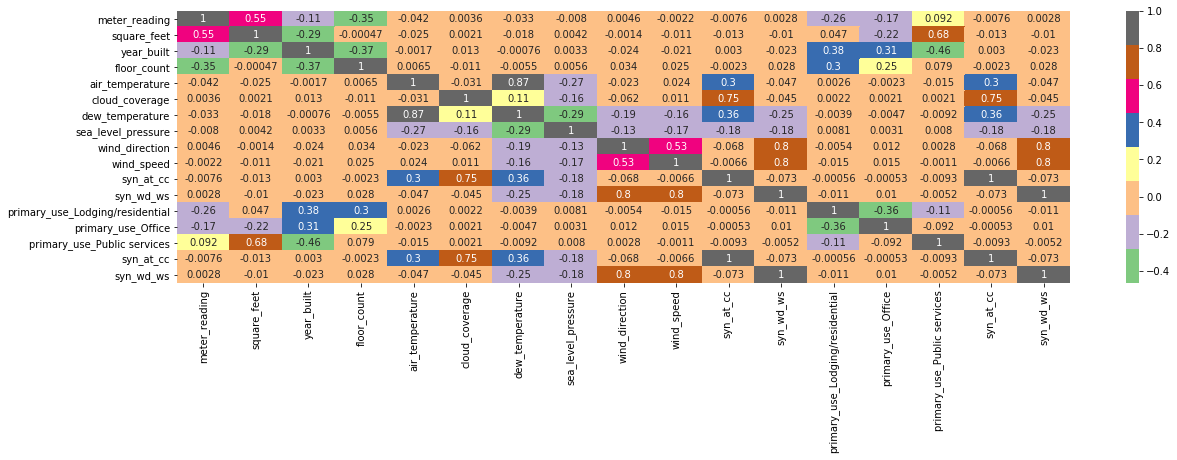

In [48]:
matrix = df_site6_train_set[['meter_reading','square_feet','year_built','floor_count',
             'air_temperature','cloud_coverage','dew_temperature','sea_level_pressure','wind_direction',
             'wind_speed', 'syn_at_cc','syn_wd_ws', 'primary_use_Lodging/residential',
             'primary_use_Office', 'primary_use_Public services',
             'syn_at_cc', 'syn_wd_ws']].corr()
f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(matrix,annot=True,cmap="Accent")

There are some variables whose correlation logically doesn't make sense (e.g. the higher the building the smaller energy consumption?). Let's examine it since correlation doesn't necessarily mean that the variable is statistically significant

In [49]:
df_all_data_site8_copy = df_all_data_site8.copy()
df_site8_train_set = (df_all_data_site8_copy.sample(frac=0.70, random_state=5))
df_site8_train_set.sort_values(['timestamp'], inplace = True)
df_site8_test_set = (df_all_data_site8_copy.drop(df_site8_train_set.index)).sample(frac=0.67, random_state=5)
df_site8_test_set.sort_values(['timestamp'], inplace = True)
df_site8_validation_set = (df_all_data_site8_copy.drop(df_site8_train_set.index)).drop(df_site8_test_set.index)
df_site8_validation_set.sort_values(['timestamp'], inplace = True)
del df_all_data_site8_copy
gc.collect()

18520

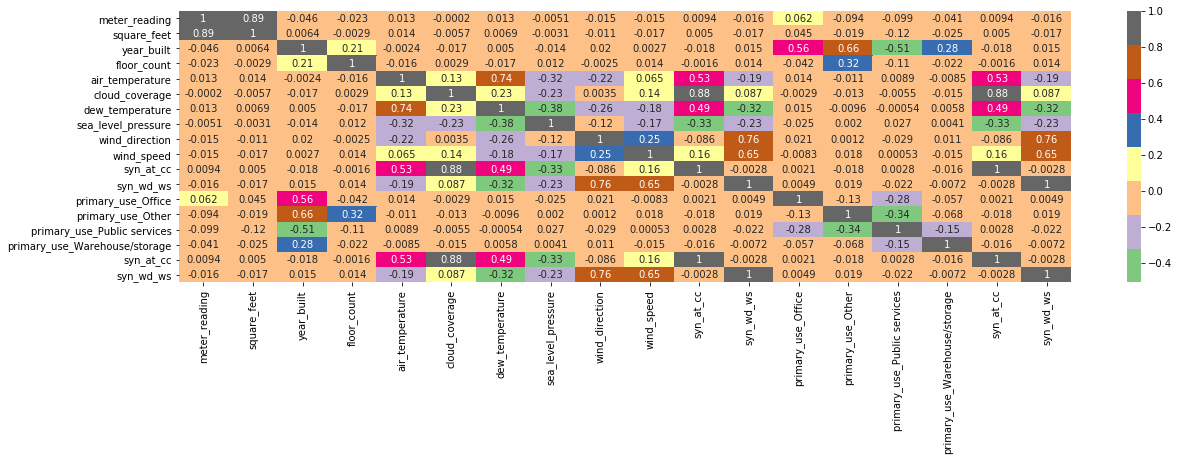

In [50]:
matrix = df_site8_train_set[['meter_reading','square_feet','year_built','floor_count',
             'air_temperature','cloud_coverage','dew_temperature','sea_level_pressure','wind_direction',
             'wind_speed', 'syn_at_cc','syn_wd_ws',
             'primary_use_Office', 'primary_use_Other', 'primary_use_Public services',
             'primary_use_Warehouse/storage','syn_at_cc', 'syn_wd_ws']].corr()
f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(matrix,annot=True,cmap="Accent")

In [51]:
df_all_data_site10_copy = df_all_data_site10.copy()
df_site10_train_set = (df_all_data_site10_copy.sample(frac=0.70, random_state=5))
df_site10_train_set.sort_values(['timestamp'], inplace = True)
df_site10_test_set = (df_all_data_site10_copy.drop(df_site10_train_set.index)).sample(frac=0.67, random_state=5)
df_site10_test_set.sort_values(['timestamp'], inplace = True)
df_site10_validation_set = (df_all_data_site10_copy.drop(df_site10_train_set.index)).drop(df_site10_test_set.index)
df_site10_validation_set.sort_values(['timestamp'], inplace = True)
del df_all_data_site10_copy
gc.collect()

25

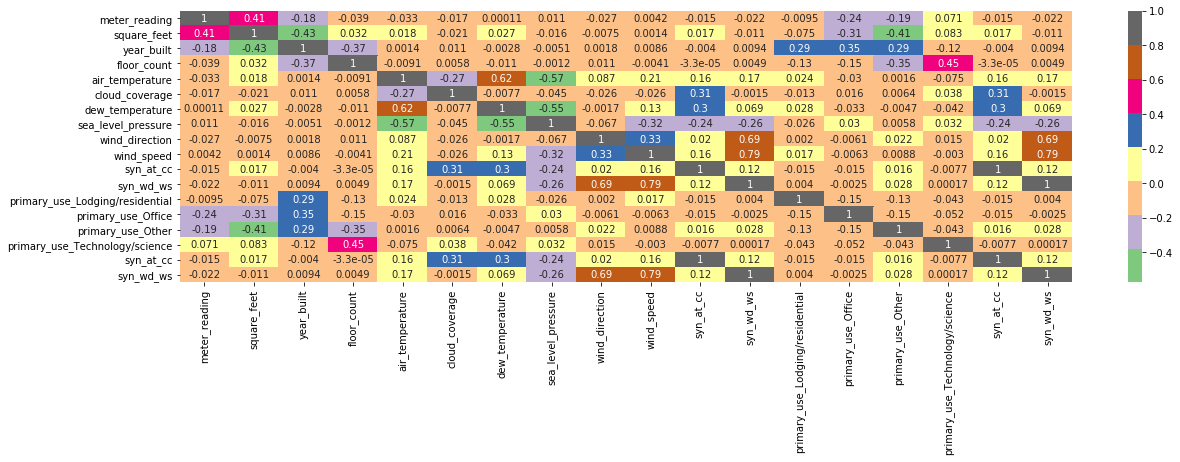

In [52]:
matrix = df_site10_train_set[['meter_reading','square_feet','year_built','floor_count',
             'air_temperature','cloud_coverage','dew_temperature','sea_level_pressure','wind_direction',
             'wind_speed', 'syn_at_cc','syn_wd_ws', 'primary_use_Lodging/residential',
             'primary_use_Office', 'primary_use_Other', 
             'primary_use_Technology/science','syn_at_cc', 'syn_wd_ws']].corr()
f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(matrix,annot=True,cmap="Accent")

Some of the correlations are pretty weak.<br> But at least there are no missing features, so we'll be able to look at the impact of all of them

# Applying different ML techniques to the 3 datasets

<a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents"><span class="toc-item-num">Jump back to <b>Table of Contents</b></a></span></li>

In [53]:
df_site6_train_set.describe()

,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,...,building_id_777,building_id_778,building_id_779,building_id_780,building_id_781,building_id_782,building_id_784,building_id_785,building_id_787,building_id_788
count,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,175.500626,5.996094,92176.609375,inf,2.439453,inf,1.343750,7.347656,0.745605,inf,...,0.030143,0.026286,0.025857,0.027000,0.025571,0.027857,0.025571,0.028000,0.028000,0.028000
std,223.296829,0.003906,77600.382812,17.21875,1.210938,9.968750,2.287109,11.093750,5.625000,6.644531,...,0.170993,0.159995,0.158720,0.162095,0.157864,0.164575,0.157864,0.164985,0.164985,0.164985
min,1.207200,6.000000,13512.000000,1919.00000,1.000000,-13.296875,0.000000,-23.296875,-1.000000,991.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.641676,6.000000,44352.000000,1966.00000,1.000000,7.199219,0.000000,-1.099609,0.000000,1013.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.297199,6.000000,70042.000000,1976.00000,3.000000,16.093750,0.000000,9.398438,0.000000,1017.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,191.275002,6.000000,105791.000000,1976.00000,3.000000,22.796875,2.000000,17.203125,0.000000,1021.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1285.030029,6.000000,401753.000000,1976.00000,5.000000,37.187500,9.000000,24.406250,124.000000,1040.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
columns_train6 = list(df_site6_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp'], axis=1).columns)

x_train6 = df_site6_train_set[columns_train6].values
x_test6 = df_site6_test_set[columns_train6].values
x_val6 = df_site6_validation_set[columns_train6].values #we won't use validation until later on, but just to make sure it has the same shape
y_train6 = df_site6_train_set['meter_reading'].values
y_test6 = df_site6_test_set['meter_reading'].values

print('Training shapes:',x_train6.shape, y_train6.shape)
print('Test shapes:',x_test6.shape, y_test6.shape)

Training shapes: (7000, 54) (7000,)
Test shapes: (2010, 54) (2010,)


In [55]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train6 = scaler.fit_transform(x_train6)
x_test6 = scaler.fit_transform(x_test6)
x_val6 = scaler.fit_transform(x_val6)

In [56]:
df_site8_train_set.describe()

,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,...,building_id_864,building_id_865,building_id_866,building_id_867,building_id_868,building_id_869,building_id_870,building_id_871,building_id_872,building_id_873
count,7000.000000,7000.0,7000.000000,7000.0000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.0000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,67.791275,8.0,31190.511719,inf,1.015625,inf,4.289062,inf,1.30957,inf,...,0.018286,0.014143,0.014429,0.014000,0.014000,0.015286,0.014143,0.016571,0.011571,0.014429
std,219.427994,0.0,108838.687500,25.0625,0.124878,6.132812,2.400391,6.714844,inf,4.1875,...,0.133992,0.118088,0.119258,0.117499,0.117499,0.122696,0.118088,0.127668,0.106954,0.119258
min,0.041700,8.0,356.000000,1919.0000,1.000000,2.800781,0.000000,-9.398438,-1.00000,992.5000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.666700,8.0,3729.000000,1919.0000,1.000000,18.906250,2.000000,12.796875,0.00000,1015.5000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.541700,8.0,8168.000000,1919.0000,1.000000,23.906250,4.000000,18.296875,0.00000,1018.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.666698,8.0,19446.000000,1975.0000,1.000000,26.703125,6.000000,22.203125,0.00000,1020.5000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2220.830078,8.0,875000.000000,1976.0000,2.000000,36.093750,9.000000,25.593750,343.00000,1030.0000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
columns_train8 = list(df_site8_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp'], axis=1).columns)

x_train8 = df_site8_train_set[columns_train8].values
x_test8 = df_site8_test_set[columns_train8].values
x_val8 = df_site8_validation_set[columns_train8].values #we won't use validation until later on, but just to make sure it has the same shape
y_train8 = df_site8_train_set['meter_reading'].values
y_test8 = df_site8_test_set['meter_reading'].values

print('Training shapes:',x_train8.shape, y_train8.shape)
print('Test shapes:',x_test8.shape, y_test8.shape)

Training shapes: (7000, 88) (7000,)
Test shapes: (2010, 88) (2010,)


In [58]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train8 = scaler.fit_transform(x_train8)
x_test8 = scaler.fit_transform(x_test8)
x_val8 = scaler.fit_transform(x_val8)

In [59]:
df_site10_train_set.describe()

,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,...,building_id_1018,building_id_1019,building_id_1020,building_id_1021,building_id_1022,building_id_1023,building_id_1024,building_id_1025,building_id_1026,building_id_1027
count,7000.000000,7000.0,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,...,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000
mean,80.843979,inf,70942.085938,inf,2.039062,inf,0.919922,0.009422,0.477539,inf,...,0.03100,0.041143,0.037000,0.035429,0.029143,0.038714,0.012429,0.03800,0.037714,0.035429
std,87.323853,0.0,55869.781250,19.015625,1.061523,11.125000,1.948242,5.585938,3.570312,8.59375,...,0.17333,0.198635,0.188775,0.184874,0.168219,0.192927,0.110796,0.19121,0.190518,0.184874
min,0.320000,10.0,4482.000000,1919.000000,1.000000,-16.703125,0.000000,-20.000000,-1.000000,991.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,27.000000,10.0,26325.000000,1962.000000,1.000000,2.199219,0.000000,-3.300781,0.000000,1010.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,56.500000,10.0,65144.000000,1962.000000,2.000000,11.101562,0.000000,0.000000,0.000000,1014.50000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,107.750000,10.0,94751.000000,1976.000000,2.000000,20.000000,0.000000,3.900391,0.000000,1021.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1002.390015,10.0,213762.000000,1976.000000,6.000000,36.687500,9.000000,14.398438,66.000000,1043.00000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [60]:
columns_train10 = list(df_site10_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp'], axis=1).columns)

x_train10 = df_site10_train_set[columns_train10].values
x_test10 = df_site10_test_set[columns_train10].values
x_val10 = df_site10_validation_set[columns_train10].values #we won't use validation until later on, but just to make sure it has the same shape
y_train10 = df_site10_train_set['meter_reading'].values
y_test10 = df_site10_test_set['meter_reading'].values

print('Training shapes:',x_train10.shape, y_train10.shape)
print('Test shapes:',x_test10.shape, y_test10.shape)

Training shapes: (7000, 49) (7000,)
Test shapes: (2010, 49) (2010,)


In [61]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train10 = scaler.fit_transform(x_train10)
x_test10 = scaler.fit_transform(x_test10)
x_val10 = scaler.fit_transform(x_val10)

starting with <b>OLS</b> for <b>site 6</b>

In [62]:
model = sm.OLS(y_train6,x_train6).fit()
model_prediction6 = model.predict(x_train6)

model_details6 = model.summary(xname=columns_train6)
print(model_details6)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     4196.
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        14:19:52   Log-Likelihood:                -36186.
No. Observations:                7000   AIC:                         7.246e+04
Df Residuals:                    6955   BIC:                         7.277e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

Rsq is pretty good however, few of the variables have pretty significant p values (>0.05)and low t-stats (|t|<2) so by rule of thumb we remove them and re-run the OLS model before proceeding to other types<br> we'll tidy up the nan variables as well<br>
Unfortunately, that means that there are no synergy effects between the pairs of variables we were testing, at least not in this dataset

In [63]:
columns_train6 = list(df_site6_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp',
'floor_count','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure', 'syn_at_cc','syn_wd_ws',
'building_id_756','building_id_781'
                                              ], axis=1).columns)
          
x_train6 = df_site6_train_set[columns_train6].values
x_test6 = df_site6_test_set[columns_train6].values

y_train6 = df_site6_train_set['meter_reading'].values
y_test6 = df_site6_test_set['meter_reading'].values

print('Training shapes:',x_train6.shape, y_train6.shape)
print('Test shapes:',x_test6.shape, y_test6.shape)

Training shapes: (7000, 45) (7000,)
Test shapes: (2010, 45) (2010,)


In [64]:
model = sm.OLS(y_train6,x_train6).fit()
model_prediction6_OLS = model.predict(x_train6)

model_details6_OLS = model.summary(xname=columns_train6)
print(model_details6_OLS)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 4.640e+04
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        14:19:52   Log-Likelihood:                -36188.
No. Observations:                7000   AIC:                         7.239e+04
Df Residuals:                    6995   BIC:                         7.242e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1827: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [65]:
columns_train6 = list(df_site6_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp',
'floor_count','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure', 'syn_at_cc','syn_wd_ws','building_id_756','building_id_781'
,'building_id_746','building_id_758','building_id_779'
                                              ], axis=1).columns)
          
x_train6 = df_site6_train_set[columns_train6].values
x_test6 = df_site6_test_set[columns_train6].values

y_train6 = df_site6_train_set['meter_reading'].values
y_test6 = df_site6_test_set['meter_reading'].values

print('Training shapes:',x_train6.shape, y_train6.shape)
print('Test shapes:',x_test6.shape, y_test6.shape)

Training shapes: (7000, 42) (7000,)
Test shapes: (2010, 42) (2010,)


In [66]:
model = sm.OLS(y_train6,x_train6).fit()
model_prediction6_OLS = model.predict(x_train6)

model_details6_OLS = model.summary(xname=columns_train6)
print(model_details6_OLS)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 4.636e+04
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -36191.
No. Observations:                7000   AIC:                         7.239e+04
Df Residuals:                    6995   BIC:                         7.243e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [67]:
columns_train6 = list(df_site6_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp',
'floor_count','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure', 'syn_at_cc','syn_wd_ws','building_id_756','building_id_781'
,'building_id_746','building_id_758','building_id_779',
'primary_use_Entertainment/public assembly'
                                              ], axis=1).columns)
          
x_train6 = df_site6_train_set[columns_train6].values
x_test6 = df_site6_test_set[columns_train6].values

y_train6 = df_site6_train_set['meter_reading'].values
y_test6 = df_site6_test_set['meter_reading'].values

x_val6 = df_site6_validation_set[columns_train6].values #we won't use validation until later on, but just to make sure it has the same shape
y_val6 = df_site6_validation_set['meter_reading'].values

print('Training shapes:',x_train6.shape, y_train6.shape)
print('Test shapes:',x_test6.shape, y_test6.shape)
print('Val shapes:',x_val6.shape, y_val6.shape)

Training shapes: (7000, 41) (7000,)
Test shapes: (2010, 41) (2010,)
Val shapes: (990, 41) (990,)


In [68]:
model = sm.OLS(y_train6,x_train6).fit()
model_prediction6_OLS = model.predict(x_train6)

model_details6_OLS = model.summary(xname=columns_train6)
print(model_details6_OLS)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 3.708e+04
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -36191.
No. Observations:                7000   AIC:                         7.239e+04
Df Residuals:                    6994   BIC:                         7.243e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
site_id   

Looks like the train model is in a decent shape. And how it evaluates on the test?

First we need to define MAPE function since it's not out of box in sklearn. https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn/294069#294069 

In [69]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [70]:
model_prediction_OLS6 = model.predict(x_test6)

rsq_OLS6 = metrics.r2_score(y_test6, model_prediction_OLS6)
MAE_OLS6 = metrics.mean_absolute_error(y_test6, model_prediction_OLS6)
MAPE_OLS6 = mean_absolute_percentage_error(y_test6, model_prediction_OLS6)

print(rsq_OLS6)
print(MAE_OLS6)
print(MAPE_OLS6)

0.9643388057674304
24.557459
26.31489932537079


the model explains significant amount of meter reading. Unfortunately, MAE (with mean energy consumption of 175) and MAPE are quite high. Let's see if this can be improved with other techniques

Let's run it on validation dataset and store it for later

In [71]:
model_prediction_OLS6 = model.predict(x_val6)

rsq_v_OLS6 = metrics.r2_score(y_val6, model_prediction_OLS6)
MAE_v_OLS6 = metrics.mean_absolute_error(y_val6, model_prediction_OLS6)
MAPE_v_OLS6 = mean_absolute_percentage_error(y_val6, model_prediction_OLS6)

And now let's repeat all of that for other datasets starting <b>with 8 </b>

In [72]:
model = sm.OLS(y_train8,x_train8).fit()
model_prediction8 = model.predict(x_train8)

model_details8 = model.summary(xname=columns_train8)
print(model_details8)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     849.5
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -39415.
No. Observations:                7000   AIC:                         7.899e+04
Df Residuals:                    6921   BIC:                         7.953e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

Rsq is pretty good however, quite a lot of the variables have significant p values (>0.05)and low t-stats (|t|<2) so by standard practice we remove them and re-run the OLS model before proceeding to other types<br> <br>
Unfortunately, in this model as well there are no synergy effects between the pairs of variables we were testing, at least not in this dataset

In [73]:
columns_train8 = list(df_site8_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp',
'year_built','floor_count','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed', 'syn_at_cc','syn_wd_ws',
'building_id_806','building_id_808','building_id_821','building_id_829','building_id_830','building_id_832','building_id_834','building_id_838','building_id_858','building_id_860','building_id_862'
                                              ], axis=1).columns)
          
x_train8 = df_site8_train_set[columns_train8].values
x_test8 = df_site8_test_set[columns_train8].values

y_train8 = df_site8_train_set['meter_reading'].values
y_test8 = df_site8_test_set['meter_reading'].values

print('Training shapes:',x_train8.shape, y_train8.shape)
print('Test shapes:',x_test8.shape, y_test8.shape)

Training shapes: (7000, 66) (7000,)
Test shapes: (2010, 66) (2010,)


In [74]:
model = sm.OLS(y_train8,x_train8).fit()
model_prediction8_OLS = model.predict(x_train8)

model_details8_OLS = model.summary(xname=columns_train8)
print(model_details8_OLS)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 6.686e+04
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -39422.
No. Observations:                7000   AIC:                         7.885e+04
Df Residuals:                    6998   BIC:                         7.886e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

strong multicollinearity problems or that the design matrix is singular.


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1827: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


let's repeat the steps above

In [75]:
columns_train8 = list(df_site8_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp',
'year_built','floor_count','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed', 'syn_at_cc','syn_wd_ws',
'building_id_806','building_id_808','building_id_821','building_id_829','building_id_830','building_id_832','building_id_834','building_id_838','building_id_858','building_id_860','building_id_862',
'primary_use_Public services','building_id_824','building_id_833','building_id_836','building_id_840','building_id_842','building_id_859','building_id_861','building_id_865','building_id_866','building_id_868'
                                              ], axis=1).columns)
          
x_train8 = df_site8_train_set[columns_train8].values
x_test8 = df_site8_test_set[columns_train8].values

y_train8 = df_site8_train_set['meter_reading'].values
y_test8 = df_site8_test_set['meter_reading'].values

print('Training shapes:',x_train8.shape, y_train8.shape)
print('Test shapes:',x_test8.shape, y_test8.shape)

Training shapes: (7000, 55) (7000,)
Test shapes: (2010, 55) (2010,)


In [76]:
model = sm.OLS(y_train8,x_train8).fit()
model_prediction8_OLS = model.predict(x_train8)

model_details8_OLS = model.summary(xname=columns_train8)
print(model_details8_OLS)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 6.671e+04
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -39429.
No. Observations:                7000   AIC:                         7.886e+04
Df Residuals:                    6998   BIC:                         7.888e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [77]:
columns_train8 = list(df_site8_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp',
'year_built','floor_count','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed', 'syn_at_cc','syn_wd_ws',
'building_id_806','building_id_808','building_id_821','building_id_829','building_id_830','building_id_832','building_id_834','building_id_838','building_id_858','building_id_860','building_id_862',
'primary_use_Public services','building_id_824','building_id_833','building_id_836','building_id_840','building_id_842','building_id_859','building_id_861','building_id_865','building_id_866','building_id_868',
'building_id_811','building_id_813','building_id_818','building_id_819','building_id_825','building_id_827','building_id_852','building_id_867','building_id_872'
                                              ], axis=1).columns)
          
x_train8 = df_site8_train_set[columns_train8].values
x_test8 = df_site8_test_set[columns_train8].values

y_train8 = df_site8_train_set['meter_reading'].values
y_test8 = df_site8_test_set['meter_reading'].values

x_val8 = df_site8_validation_set[columns_train8].values #we won't use validation until later on, but just to make sure it has the same shape
y_val8 = df_site8_validation_set['meter_reading'].values

print('Training shapes:',x_train8.shape, y_train8.shape)
print('Test shapes:',x_test8.shape, y_test8.shape)
print('Val shapes:',x_val8.shape, y_val8.shape)

Training shapes: (7000, 46) (7000,)
Test shapes: (2010, 46) (2010,)
Val shapes: (990, 46) (990,)


In [78]:
model = sm.OLS(y_train8,x_train8).fit()
model_prediction8_OLS = model.predict(x_train8)

model_details8_OLS = model.summary(xname=columns_train8)
print(model_details8_OLS)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 6.662e+04
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -39433.
No. Observations:                7000   AIC:                         7.887e+04
Df Residuals:                    6998   BIC:                         7.888e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [79]:
columns_train8 = list(df_site8_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp',
'year_built','floor_count','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed', 'syn_at_cc','syn_wd_ws',
'building_id_806','building_id_808','building_id_821','building_id_829','building_id_830','building_id_832','building_id_834','building_id_838','building_id_858','building_id_860','building_id_862',
'primary_use_Public services','building_id_824','building_id_833','building_id_836','building_id_840','building_id_842','building_id_859','building_id_861','building_id_865','building_id_866','building_id_868',
'building_id_811','building_id_813','building_id_818','building_id_819','building_id_825','building_id_827','building_id_852','building_id_867','building_id_872',
'building_id_814','building_id_839','building_id_869'
                                              ], axis=1).columns)
          
x_train8 = df_site8_train_set[columns_train8].values
x_test8 = df_site8_test_set[columns_train8].values

y_train8 = df_site8_train_set['meter_reading'].values
y_test8 = df_site8_test_set['meter_reading'].values

x_val8 = df_site8_validation_set[columns_train8].values #we won't use validation until later on, but just to make sure it has the same shape
y_val8 = df_site8_validation_set['meter_reading'].values

print('Training shapes:',x_train8.shape, y_train8.shape)
print('Test shapes:',x_test8.shape, y_test8.shape)
print('Val shapes:',x_val8.shape, y_val8.shape)

Training shapes: (7000, 43) (7000,)
Test shapes: (2010, 43) (2010,)
Val shapes: (990, 43) (990,)


In [80]:
model = sm.OLS(y_train8,x_train8).fit()
model_prediction8_OLS = model.predict(x_train8)

model_details8_OLS = model.summary(xname=columns_train8)
print(model_details8_OLS)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 6.659e+04
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -39434.
No. Observations:                7000   AIC:                         7.887e+04
Df Residuals:                    6998   BIC:                         7.889e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [81]:
columns_train8 = list(df_site8_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp',
'year_built','floor_count','air_temperature','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed', 'syn_at_cc','syn_wd_ws',
'building_id_806','building_id_808','building_id_821','building_id_829','building_id_830','building_id_832','building_id_834','building_id_838','building_id_858','building_id_860','building_id_862',
'primary_use_Public services','building_id_824','building_id_833','building_id_836','building_id_840','building_id_842','building_id_859','building_id_861','building_id_865','building_id_866','building_id_868',
'building_id_811','building_id_813','building_id_818','building_id_819','building_id_825','building_id_827','building_id_852','building_id_867','building_id_872',
'building_id_814','building_id_839','building_id_869',
'primary_use_Entertainment/public assembly','building_id_805','building_id_807','building_id_809','building_id_810','building_id_812','building_id_815','building_id_816','building_id_817','building_id_820','building_id_822','building_id_831','building_id_835','building_id_843','building_id_844','building_id_845','building_id_846','building_id_847','building_id_856','building_id_857','building_id_870','building_id_871'
                                              ], axis=1).columns)
          
x_train8 = df_site8_train_set[columns_train8].values
x_test8 = df_site8_test_set[columns_train8].values

y_train8 = df_site8_train_set['meter_reading'].values
y_test8 = df_site8_test_set['meter_reading'].values

x_val8 = df_site8_validation_set[columns_train8].values #we won't use validation until later on, but just to make sure it has the same shape
y_val8 = df_site8_validation_set['meter_reading'].values

print('Training shapes:',x_train8.shape, y_train8.shape)
print('Test shapes:',x_test8.shape, y_test8.shape)
print('Val shapes:',x_val8.shape, y_val8.shape)

Training shapes: (7000, 21) (7000,)
Test shapes: (2010, 21) (2010,)
Val shapes: (990, 21) (990,)


In [82]:
model = sm.OLS(y_train8,x_train8).fit()
model_prediction8_OLS = model.predict(x_train8)

model_details8_OLS = model.summary(xname=columns_train8)
print(model_details8_OLS)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.214e+04
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -39441.
No. Observations:                7000   AIC:                         7.889e+04
Df Residuals:                    6996   BIC:                         7.892e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
site_id       

We're left with only categorical variables and only a handful of them, but sometimes less is more. Let's evaluate

In [83]:
model_prediction_OLS8 = model.predict(x_test8)

rsq_OLS8 = metrics.r2_score(y_test8, model_prediction_OLS8)
MAE_OLS8 = metrics.mean_absolute_error(y_test8, model_prediction_OLS8)
MAPE_OLS8 = mean_absolute_percentage_error(y_test8, model_prediction_OLS8)

print(rsq_OLS8)
print(MAE_OLS8)
print(MAPE_OLS8)

0.8790314543531652
20.337934
1265.1849746704102


A bit worse performance, MAPE especially is high

In [84]:
model_prediction_OLS8 = model.predict(x_val8)

rsq_v_OLS8 = metrics.r2_score(y_val8, model_prediction_OLS8)
MAE_v_OLS8 = metrics.mean_absolute_error(y_val8, model_prediction_OLS8)
MAPE_v_OLS8 = mean_absolute_percentage_error(y_val8, model_prediction_OLS8)

and <b>dataset 10</b>

In [85]:
model = sm.OLS(y_train10,x_train10).fit()
model_prediction10 = model.predict(x_train10)

model_details10 = model.summary(xname=columns_train10)
print(model_details10)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     464.7
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        14:19:53   Log-Likelihood:                -36798.
No. Observations:                7000   AIC:                         7.367e+04
Df Residuals:                    6961   BIC:                         7.394e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

Rsq is much lower. In addition our constant (site_id) is insignificant alongside few other variables we'll tidy up the nan variables as well<br>
The good news is that there's synergy effect between one pair of variables we were testing.

In [86]:
columns_train10 = list(df_site10_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp',
'site_id','floor_count','sea_level_pressure','wind_direction','primary_use_Other','syn_at_cc','building_id_1001','building_id_1007','building_id_1018','building_id_1021'
                                              ], axis=1).columns)
          
x_train10 = df_site10_train_set[columns_train10].values
x_test10 = df_site10_test_set[columns_train10].values

y_train10 = df_site10_train_set['meter_reading'].values
y_test10 = df_site10_test_set['meter_reading'].values

print('Training shapes:',x_train10.shape, y_train10.shape)
print('Test shapes:',x_test10.shape, y_test10.shape)

Training shapes: (7000, 39) (7000,)
Test shapes: (2010, 39) (2010,)


In [87]:
model = sm.OLS(y_train10,x_train10).fit()
model_prediction10_OLS = model.predict(x_train10)

model_details10_OLS = model.summary(xname=columns_train10)
print(model_details10_OLS)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              4326.
Date:                Wed, 06 May 2020   Prob (F-statistic):                        0.00
Time:                        14:19:53   Log-Likelihood:                         -36798.
No. Observations:                7000   AIC:                                  7.361e+04
Df Residuals:                    6991   BIC:                                  7.368e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------

In [88]:
columns_train10 = list(df_site10_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp',
'site_id','floor_count','sea_level_pressure','wind_direction','primary_use_Other','syn_at_cc','building_id_1001','building_id_1007','building_id_1018','building_id_1021',
'primary_use_Entertainment/public assembly','building_id_1022'
                                              ], axis=1).columns)
          
x_train10 = df_site10_train_set[columns_train10].values
x_test10 = df_site10_test_set[columns_train10].values

y_train10 = df_site10_train_set['meter_reading'].values
y_test10 = df_site10_test_set['meter_reading'].values

print('Training shapes:',x_train10.shape, y_train10.shape)
print('Test shapes:',x_test10.shape, y_test10.shape)

Training shapes: (7000, 37) (7000,)
Test shapes: (2010, 37) (2010,)


In [89]:
model = sm.OLS(y_train10,x_train10).fit()
model_prediction10_OLS = model.predict(x_train10)

model_details10_OLS = model.summary(xname=columns_train10)
print(model_details10_OLS)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              3892.
Date:                Wed, 06 May 2020   Prob (F-statistic):                        0.00
Time:                        14:19:53   Log-Likelihood:                         -36799.
No. Observations:                7000   AIC:                                  7.362e+04
Df Residuals:                    6990   BIC:                                  7.369e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1827: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [90]:
columns_train10 = list(df_site10_train_set.drop(['date_day','date_mth','meter_reading', 'timestamp',
'site_id','floor_count','sea_level_pressure','wind_direction','primary_use_Other','syn_at_cc','building_id_1001','building_id_1007','building_id_1018','building_id_1021',
'primary_use_Entertainment/public assembly','building_id_1022',
'building_id_1003'
                                              ], axis=1).columns)
          
x_train10 = df_site10_train_set[columns_train10].values
x_test10 = df_site10_test_set[columns_train10].values

y_train10 = df_site10_train_set['meter_reading'].values
y_test10 = df_site10_test_set['meter_reading'].values

x_val10 = df_site10_validation_set[columns_train10].values #we won't use validation until later on, but just to make sure it has the same shape
y_val10 = df_site10_validation_set['meter_reading'].values

print('Training shapes:',x_train10.shape, y_train10.shape)
print('Test shapes:',x_test10.shape, y_test10.shape)
print('Val shapes:',x_val10.shape, y_val10.shape)

Training shapes: (7000, 36) (7000,)
Test shapes: (2010, 36) (2010,)
Val shapes: (990, 36) (990,)


In [91]:
model = sm.OLS(y_train10,x_train10).fit()
model_prediction10_OLS = model.predict(x_train10)

model_details10_OLS = model.summary(xname=columns_train10)
print(model_details10_OLS)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              3890.
Date:                Wed, 06 May 2020   Prob (F-statistic):                        0.00
Time:                        14:19:54   Log-Likelihood:                         -36800.
No. Observations:                7000   AIC:                                  7.362e+04
Df Residuals:                    6990   BIC:                                  7.369e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

Looks like finally we have only significant variables impacting our model. And how it evaluates on the test?

In [92]:
model_prediction_OLS10 = model.predict(x_test10)

rsq_OLS10 = metrics.r2_score(y_test10, model_prediction_OLS10)
MAE_OLS10 = metrics.mean_absolute_error(y_test10, model_prediction_OLS10)
MAPE_OLS10 = mean_absolute_percentage_error(y_test10, model_prediction_OLS10)

print(rsq_OLS10)
print(MAE_OLS10)
print(MAPE_OLS10)

0.7095573344336087
25.83562
89.85562920570374


In [93]:
model_prediction_OLS10 = model.predict(x_val10)

rsq_v_OLS10 = metrics.r2_score(y_val10, model_prediction_OLS10)
MAE_v_OLS10 = metrics.mean_absolute_error(y_val10, model_prediction_OLS10)
MAPE_v_OLS10 = mean_absolute_percentage_error(y_val10, model_prediction_OLS10)

<b>k-fold crossvalidation</b>

similar to lab from DMML class we'll try polynomial k-fold <br>
http://www.science.smith.edu/~jcrouser/SDS293/labs/lab7-py.html
unfortuantely polynomial k-fold displays a shape error when running prediction - so I couldn't test the results

In [94]:
lm = skl_lm.LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=False)

model = lm.fit(x_train6, y_train6)
scores = cross_val_score(model, x_train6, y_train6, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=10)
print(scores)
model_prediction_KF6 = model.predict(x_train6)
rsq_KF6 = metrics.r2_score(y_train6, model_prediction_KF6)
MAE_KF6 = metrics.mean_absolute_error(y_train6, model_prediction_KF6)
MAPE_KF6 = mean_absolute_percentage_error(y_train6, model_prediction_KF6)
print("Train Rsq: " + str(rsq_KF6) + ", MAE: " + str(MAE_KF6) + ", MAPE: " + str(MAPE_KF6))
model_prediction_KF6 = model.predict(x_test6)
rsq_KF6 = metrics.r2_score(y_test6, model_prediction_KF6)
MAE_KF6 = metrics.mean_absolute_error(y_test6, model_prediction_KF6)
MAPE_KF6 = mean_absolute_percentage_error(y_test6, model_prediction_KF6)
print("Test  Rsq: " + str(rsq_KF6) + ", MAE: " + str(MAE_KF6) + ", MAPE: " + str(MAPE_KF6))


[-3159.00366211 -4134.61376953 -2691.36938477 -2005.44824219
 -1451.60327148 -3109.01928711 -1729.81018066 -2766.9453125
 -1669.68505859 -2366.09350586]
Train Rsq: 0.9594462554438532, MAE: 29.13546, MAPE: 35.82421541213989
Test  Rsq: 0.9598198178275544, MAE: 29.137037, MAPE: 36.1558735370636


And let's store validation prediction for later on

In [95]:
model_prediction_KF6 = model.predict(x_val6)
rsq_v_KF6 = metrics.r2_score(y_val6, model_prediction_KF6)
MAE_v_KF6 = metrics.mean_absolute_error(y_val6, model_prediction_KF6)
MAPE_v_KF6 = mean_absolute_percentage_error(y_val6, model_prediction_KF6)

In [96]:
#lm = skl_lm.LinearRegression()
#crossvalidation = KFold(n_splits=10, shuffle=False)

#for i in range(1,3):
#    poly = PolynomialFeatures(degree=i)
#    X_current = poly.fit_transform(x_train6)
#    model = lm.fit(x_train6, y_train6)
#    scores = cross_val_score(model, X_current, y_train6, scoring="neg_mean_squared_error", cv=crossvalidation,
# n_jobs=1)
    
#    print("Train Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))
#    X_test = poly.fit_transform(x_test6)
#    model_prediction_KF6 = model.predict(X_test)

In [97]:
lm = skl_lm.LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=False)

model = lm.fit(x_train8, y_train8)
scores = cross_val_score(model, x_train8, y_train8, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=10)

model_prediction_KF8 = model.predict(x_train8)
rsq_KF8 = metrics.r2_score(y_train8, model_prediction_KF8)
MAE_KF8 = metrics.mean_absolute_error(y_train8, model_prediction_KF8)
MAPE_KF8 = mean_absolute_percentage_error(y_train8, model_prediction_KF8)
print("Train Rsq: " + str(rsq_KF8) + ", MAE: " + str(MAE_KF8) + ", MAPE: " + str(MAPE_KF8))
model_prediction_KF8 = model.predict(x_test8)
rsq_KF8 = metrics.r2_score(y_test8, model_prediction_KF8)
MAE_KF8 = metrics.mean_absolute_error(y_test8, model_prediction_KF8)
MAPE_KF8 = mean_absolute_percentage_error(y_test8, model_prediction_KF8)
print("Test  Rsq: " + str(rsq_KF8) + ", MAE: " + str(MAE_KF8) + ", MAPE: " + str(MAPE_KF8))


Train Rsq: 0.9047246527547217, MAE: 18.696985, MAPE: 395.468807220459
Test  Rsq: 0.8789868283522767, MAE: 20.336859, MAPE: 1263.8392448425293


similarly to OLS, MAPE is very high on the test set

In [98]:
model_prediction_KF8 = model.predict(x_val8)
rsq_v_KF8 = metrics.r2_score(y_val8, model_prediction_KF8)
MAE_v_KF8 = metrics.mean_absolute_error(y_val8, model_prediction_KF8)
MAPE_v_KF8 = mean_absolute_percentage_error(y_val8, model_prediction_KF8)

In [99]:
lm = skl_lm.LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=False)

model = lm.fit(x_train10, y_train10)
scores = cross_val_score(model, x_train10, y_train10, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=10)

model_prediction_KF10 = model.predict(x_train10)
rsq_KF10 = metrics.r2_score(y_train10, model_prediction_KF10)
MAE_KF10 = metrics.mean_absolute_error(y_train10, model_prediction_KF10)
MAPE_KF10 = mean_absolute_percentage_error(y_train10, model_prediction_KF10)
print("Train Rsq: " + str(rsq_KF10) + ", MAE: " + str(MAE_KF10) + ", MAPE: " + str(MAPE_KF10))
model_prediction_KF10 = model.predict(x_test10)
rsq_KF10 = metrics.r2_score(y_test10, model_prediction_KF10)
MAE_KF10 = metrics.mean_absolute_error(y_test10, model_prediction_KF10)
MAPE_KF10 = mean_absolute_percentage_error(y_test10, model_prediction_KF10)
print("Test  Rsq: " + str(rsq_KF10) + ", MAE: " + str(MAE_KF10) + ", MAPE: " + str(MAPE_KF10))


Train Rsq: 0.7165828661039045, MAE: 24.991085, MAPE: 84.24633145332336
Test  Rsq: 0.7088461804699212, MAE: 25.872808, MAPE: 88.57523202896118


In [100]:
model_prediction_KF10 = model.predict(x_val10)
rsq_v_KF10 = metrics.r2_score(y_val10, model_prediction_KF10)
MAE_v_KF10 = metrics.mean_absolute_error(y_val10, model_prediction_KF10)
MAPE_v_KF10 = mean_absolute_percentage_error(y_val10, model_prediction_KF10)

<b>Principal Component Regression</b>

starting with the same columns as we ran last model

In [101]:
x_train6 = df_site6_train_set[columns_train6].values
x_test6 = df_site6_test_set[columns_train6].values
x_val6 = df_site6_validation_set[columns_train6].values

y_train6 = df_site6_train_set['meter_reading'].values
y_test6 = df_site6_test_set['meter_reading'].values
y_val6 = df_site6_validation_set['meter_reading'].values

print('Training shapes:',x_train6.shape, y_train6.shape)
print('Test shapes:',x_test6.shape, y_test6.shape)

Training shapes: (7000, 41) (7000,)
Test shapes: (2010, 41) (2010,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(-1, 46.2)

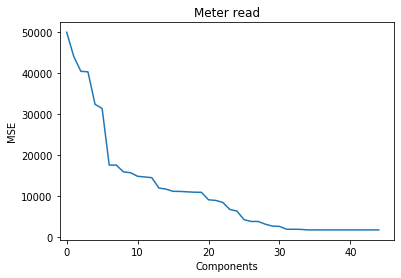

In [102]:
pca = PCA()
x_reduced_train6 = pca.fit_transform(scale(x_train6))
n = len(x_reduced_train6)

kf_10 = KFold(n_splits=10, shuffle=True, random_state=5)

regression = LinearRegression()
mse = []

score = -1*cross_val_score(regression, np.ones((n,1)), y_train6.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 45):
    score = -1*cross_val_score(regression, x_reduced_train6[:,:i], y_train6.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse)
plt.xlabel('Components')
plt.ylabel('MSE')
plt.title('Meter read')
plt.xlim(xmin=-1)

Number of components when error is the lowest around 33. Let's see how it evaluates

In [103]:
x_reduced_train6 = pca.transform(scale(x_train6))[:,:34]

regr = LinearRegression()
regr.fit(x_reduced_train6[:,:34], y_train6)

model_prediction_PCR6 = regr.predict(x_reduced_train6)

rsq_PCR6 = metrics.r2_score(y_train6, model_prediction_PCR6)
MAE_PCR6 = metrics.mean_absolute_error(y_train6, model_prediction_PCR6)
MAPE_PCR6 = mean_absolute_percentage_error(y_train6, model_prediction_PCR6)

print(rsq_PCR6)
print(MAE_PCR6)
print(MAPE_PCR6)

0.9635727363050184
24.823631
26.52890384197235


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


OK, Rsq remained over 90% however MAPE increased. Let's see if it's the same for test dataset.

In [104]:
x_reduced_test6 = pca.transform(scale(x_test6))[:,:34]

regr = LinearRegression()
regr.fit(x_reduced_test6[:,:34], y_test6)
model_prediction_PCR6 = regr.predict(x_reduced_test6)

rsq_PCR6 = metrics.r2_score(y_test6, model_prediction_PCR6)
MAE_PCR6 = metrics.mean_absolute_error(y_test6, model_prediction_PCR6)
MAPE_PCR6 = mean_absolute_percentage_error(y_test6, model_prediction_PCR6)

print(rsq_PCR6)
print(MAE_PCR6)
print(MAPE_PCR6)

0.9648032158290375
24.422907
26.210883259773254


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Quite similar to the training dataset, let's run validation dataset

In [105]:
x_reduced_val6 = pca.transform(scale(x_val6))[:,:34]

regr = LinearRegression()
regr.fit(x_reduced_val6[:,:34], y_val6)
model_prediction_PCR6 = regr.predict(x_reduced_val6)

rsq_v_PCR6 = metrics.r2_score(y_val6, model_prediction_PCR6)
MAE_v_PCR6 = metrics.mean_absolute_error(y_val6, model_prediction_PCR6)
MAPE_v_PCR6 = mean_absolute_percentage_error(y_val6, model_prediction_PCR6)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Let's move to<b> dataset 8</b>

In [106]:

x_train8 = df_site8_train_set[columns_train8].values
x_test8 = df_site8_test_set[columns_train8].values
x_val8 = df_site8_validation_set[columns_train8].values

y_train8 = df_site8_train_set['meter_reading'].values
y_test8 = df_site8_test_set['meter_reading'].values
y_val8 = df_site8_validation_set['meter_reading'].values

print('Training shapes:',x_train8.shape, y_train8.shape)
print('Test shapes:',x_test8.shape, y_test8.shape)
print('Val shapes:',x_val8.shape, y_val8.shape)

Training shapes: (7000, 21) (7000,)
Test shapes: (2010, 21) (2010,)
Val shapes: (990, 21) (990,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(-1, 46.2)

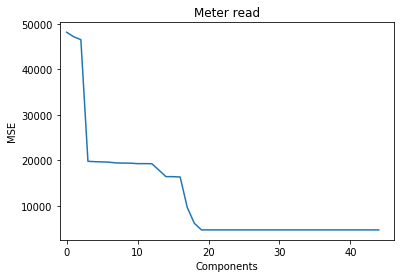

In [107]:
pca = PCA()
x_reduced_train8 = pca.fit_transform(scale(x_train8))
n = len(x_reduced_train8)

kf_10 = KFold(n_splits=10, shuffle=True, random_state=5)

regression = LinearRegression()
mse = []

score = -1*cross_val_score(regression, np.ones((n,1)), y_train8.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 45):
    score = -1*cross_val_score(regression, x_reduced_train8[:,:i], y_train8.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse)
plt.xlabel('Components')
plt.ylabel('MSE')
plt.title('Meter read')
plt.xlim(xmin=-1)

Number of components when error is the lowest at 19. Let's see how it evaluates

In [108]:
x_reduced_train8 = pca.transform(scale(x_train8))[:,:20]

regr = LinearRegression()
regr.fit(x_reduced_train8[:,:20], y_train8)

model_prediction_PCR8 = regr.predict(x_reduced_train8)

rsq_PCR8 = metrics.r2_score(y_train8, model_prediction_PCR8)
MAE_PCR8 = metrics.mean_absolute_error(y_train8, model_prediction_PCR8)
MAPE_PCR8 = mean_absolute_percentage_error(y_train8, model_prediction_PCR8)

print(rsq_PCR8)
print(MAE_PCR8)
print(MAPE_PCR8)

0.9047248341603948
18.70007
396.9045162200928


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


OK, Rsq remained over 90% however MAPE shot up. Let's see if it's the same for test dataset.

In [109]:
x_reduced_test8 = pca.transform(scale(x_test8))[:,:20]

regr = LinearRegression()
regr.fit(x_reduced_test8[:,:20], y_test8)
model_prediction_PCR8 = regr.predict(x_reduced_test8)

rsq_PCR8 = metrics.r2_score(y_test8, model_prediction_PCR8)
MAE_PCR8 = metrics.mean_absolute_error(y_test8, model_prediction_PCR8)
MAPE_PCR8 = mean_absolute_percentage_error(y_test8, model_prediction_PCR8)

print(rsq_PCR8)
print(MAE_PCR8)
print(MAPE_PCR8)

0.8819745506426312
20.262815
1254.0395736694336


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


On one side it's good to see that model parameters remain consistent, however MAPE could be lower

In [110]:
x_reduced_val8 = pca.transform(scale(x_val8))[:,:20]

regr = LinearRegression()
regr.fit(x_reduced_val8[:,:20], y_val8)
model_prediction_PCR8 = regr.predict(x_reduced_val8)

rsq_v_PCR8 = metrics.r2_score(y_val8, model_prediction_PCR8)
MAE_v_PCR8 = metrics.mean_absolute_error(y_val8, model_prediction_PCR8)
MAPE_v_PCR8 = mean_absolute_percentage_error(y_val8, model_prediction_PCR8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


and the <b>dataset 10</b>

In [111]:

x_train10 = df_site10_train_set[columns_train10].values
x_test10 = df_site10_test_set[columns_train10].values
x_val10 = df_site10_validation_set[columns_train10].values

y_train10 = df_site10_train_set['meter_reading'].values
y_test10 = df_site10_test_set['meter_reading'].values
y_val10 = df_site10_validation_set['meter_reading'].values

print('Training shapes:',x_train10.shape, y_train10.shape)
print('Test shapes:',x_test10.shape, y_test10.shape)
print('Val shapes:',x_val10.shape, y_val10.shape)

Training shapes: (7000, 36) (7000,)
Test shapes: (2010, 36) (2010,)
Val shapes: (990, 36) (990,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(-1, 46.2)

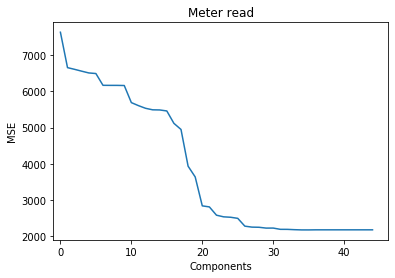

In [112]:
pca = PCA()
x_reduced_train10 = pca.fit_transform(scale(x_train10))
n = len(x_reduced_train10)

kf_10 = KFold(n_splits=10, shuffle=True, random_state=5)

regression = LinearRegression()
mse = []

score = -1*cross_val_score(regression, np.ones((n,1)), y_train10.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 45):
    score = -1*cross_val_score(regression, x_reduced_train10[:,:i], y_train10.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse)
plt.xlabel('Components')
plt.ylabel('MSE')
plt.title('Meter read')
plt.xlim(xmin=-1)

Number of components when error is the lowest at 31. Let's see how it evaluates

In [113]:
x_reduced_train10 = pca.transform(scale(x_train10))[:,:32]

regr = LinearRegression()
regr.fit(x_reduced_train10[:,:32], y_train10)

model_prediction_PCR10 = regr.predict(x_reduced_train10)

rsq_PCR10 = metrics.r2_score(y_train10, model_prediction_PCR10)
MAE_PCR10 = metrics.mean_absolute_error(y_train10, model_prediction_PCR10)
MAPE_PCR10 = mean_absolute_percentage_error(y_train10, model_prediction_PCR10)

print(rsq_PCR10)
print(MAE_PCR10)
print(MAPE_PCR10)

0.7151433539872599
25.179436
88.97507190704346


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Again, relatively consistant results 

In [114]:
x_reduced_test10 = pca.transform(scale(x_test10))[:,:32]

regr = LinearRegression()
regr.fit(x_reduced_test10[:,:32], y_test10)
model_prediction_PCR10 = regr.predict(x_reduced_test10)

rsq_PCR10 = metrics.r2_score(y_test10, model_prediction_PCR10)
MAE_PCR10 = metrics.mean_absolute_error(y_test10, model_prediction_PCR10)
MAPE_PCR10 = mean_absolute_percentage_error(y_test10, model_prediction_PCR10)

print(rsq_PCR10)
print(MAE_PCR10)
print(MAPE_PCR10)

0.7113245499828584
26.119724
99.1014301776886


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [115]:
x_reduced_val10 = pca.transform(scale(x_val10))[:,:32]

regr = LinearRegression()
regr.fit(x_reduced_val10[:,:32], y_val10)
model_prediction_PCR10 = regr.predict(x_reduced_val10)

rsq_v_PCR10 = metrics.r2_score(y_val10, model_prediction_PCR10)
MAE_v_PCR10 = metrics.mean_absolute_error(y_val10, model_prediction_PCR10)
MAPE_v_PCR10 = mean_absolute_percentage_error(y_val10, model_prediction_PCR10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


<b>Partial Least Squares

In [116]:
for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(x_train6), y_train6, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numer

array([ 7.76    , 13.93    , 19.970001, 25.560001, 30.640001, 34.870003,
       38.930004, 42.240005, 45.430004, 48.330006, 51.220005, 54.110004,
       57.000004, 59.880005, 62.760006, 65.64001 , 68.520004, 71.4     ,
       74.28    , 77.15    , 80.01    , 82.87    , 85.72    , 88.57    ,
       91.39    , 94.12    , 96.37    , 97.37    , 98.22    , 98.78    ,
       99.33    , 99.700005, 99.94    , 99.98    , 99.98    , 99.98    ],
      dtype=float32)

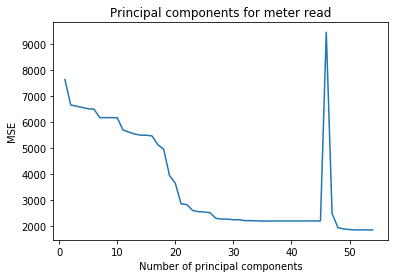

In [117]:
plt.plot(np.arange(1, 55), np.array(mse),'')
plt.xlabel('Number of principal components')
plt.ylabel('MSE')
plt.title('Principal components for meter read')
plt.xlim(xmin=-1)
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

the lowest CV error occurs when number of components is 32, let's see how it evaluates

In [118]:
pls6 = PLSRegression(n_components=32)
pls6.fit(x_train6, y_train6)

model_prediction_PLS6 = pls6.predict(x_train6)

rsq_PLS6 = metrics.r2_score(y_train6, model_prediction_PLS6)
MAE_PLS6 = metrics.mean_absolute_error(y_train6, model_prediction_PLS6)
MAPE_PLS6 = mean_absolute_percentage_error(y_train6, model_prediction_PLS6)

print(rsq_PLS6)
print(MAE_PLS6)
print(MAPE_PLS6)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:348: RuntimeWarning: invalid value encountered in true_divide
  y_scores = np.dot(Yk, y_weights) / y_ss


0.9636485727422034
24.685238741523147
396.37510578435496


Rsq and MAE remained comparable but MAPE went significantly up

In [119]:
model_prediction_PLS6 = pls6.predict(x_test6)

rsq_PLS6 = metrics.r2_score(y_test6, model_prediction_PLS6)
MAE_PLS6 = metrics.mean_absolute_error(y_test6, model_prediction_PLS6)
MAPE_PLS6 = mean_absolute_percentage_error(y_test6, model_prediction_PLS6)

print(rsq_PLS6)
print(MAE_PLS6)
print(MAPE_PLS6)

0.9643388180613581
24.557486029261216
425.38289528352874


Even worse for test dataset, let's run validation dataset..

In [120]:
model_prediction_PLS6 = pls6.predict(x_val6)

rsq_v_PLS6 = metrics.r2_score(y_val6, model_prediction_PLS6)
MAE_v_PLS6 = metrics.mean_absolute_error(y_val6, model_prediction_PLS6)
MAPE_v_PLS6 = mean_absolute_percentage_error(y_val6, model_prediction_PLS6)

and move on to <b> dataset 8 </b>

In [121]:
for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(x_train8), y_train8, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numer

array([ 7.76    , 13.93    , 19.970001, 25.560001, 30.640001, 34.870003,
       38.930004, 42.240005, 45.430004, 48.330006, 51.220005, 54.110004,
       57.000004, 59.880005, 62.760006, 65.64001 , 68.520004, 71.4     ,
       74.28    , 77.15    , 80.01    , 82.87    , 85.72    , 88.57    ,
       91.39    , 94.12    , 96.37    , 97.37    , 98.22    , 98.78    ,
       99.33    , 99.700005, 99.94    , 99.98    , 99.98    , 99.98    ],
      dtype=float32)

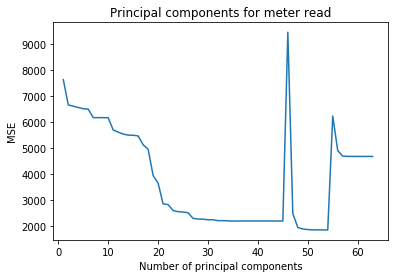

In [122]:
plt.plot(np.arange(1, 64), np.array(mse),'')
plt.xlabel('Number of principal components')
plt.ylabel('MSE')
plt.title('Principal components for meter read')
plt.xlim(xmin=-1)
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

the lowest CV error occurs when number of components is 52, but it's after inconsistant increase and just before another.<br> The previous lowest is at 32 but we have only 21 independant variables so number of components over that number won't work. Let's keep it at 21 and see how it compares

In [123]:
pls = PLSRegression(n_components=21)
pls.fit(x_train8, y_train8)

model_prediction_PLS8 = pls.predict(x_train8)

rsq_PLS8 = metrics.r2_score(y_train8, model_prediction_PLS8)
MAE_PLS8 = metrics.mean_absolute_error(y_train8, model_prediction_PLS8)
MAPE_PLS8 = mean_absolute_percentage_error(y_train8, model_prediction_PLS8)

print(rsq_PLS8)
print(MAE_PLS8)
print(MAPE_PLS8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 20
  warnings.warn('X scores are null at iteration %s' % k)


0.9047248344998337
18.700070234973172
4856.090374688496


Rsq and MAE remained comparable but MAPE went significantly up

In [124]:
model_prediction_PLS8 = pls.predict(x_test8)

rsq_PLS8 = metrics.r2_score(y_test8, model_prediction_PLS8)
MAE_PLS8 = metrics.mean_absolute_error(y_test8, model_prediction_PLS8)
MAPE_PLS8 = mean_absolute_percentage_error(y_test8, model_prediction_PLS8)

print(rsq_PLS8)
print(MAE_PLS8)
print(MAPE_PLS8)

0.8790314501976755
20.337935207943172
5224.9152950906855


In [125]:
model_prediction_PLS8 = pls.predict(x_val8)

rsq_v_PLS8 = metrics.r2_score(y_val8, model_prediction_PLS8)
MAE_v_PLS8 = metrics.mean_absolute_error(y_val8, model_prediction_PLS8)
MAPE_v_PLS8 = mean_absolute_percentage_error(y_val8, model_prediction_PLS8)

<b>dataset 10</b>

In [126]:
for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(x_train10), y_train10, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numer

array([ 7.76    , 13.93    , 19.970001, 25.560001, 30.640001, 34.870003,
       38.930004, 42.240005, 45.430004, 48.330006, 51.220005, 54.110004,
       57.000004, 59.880005, 62.760006, 65.64001 , 68.520004, 71.4     ,
       74.28    , 77.15    , 80.01    , 82.87    , 85.72    , 88.57    ,
       91.39    , 94.12    , 96.37    , 97.37    , 98.22    , 98.78    ,
       99.33    , 99.700005, 99.94    , 99.98    , 99.98    , 99.98    ],
      dtype=float32)

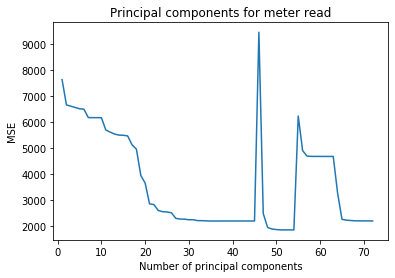

In [127]:
plt.plot(np.arange(1, 73), np.array(mse),'')
plt.xlabel('Number of principal components')
plt.ylabel('MSE')
plt.title('Principal components for meter read')
plt.xlim(xmin=-1)
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

the lowest CV error occurs when number of components is 35, let's see how it evaluates

In [128]:
pls = PLSRegression(n_components=35)
pls.fit(x_train10, y_train10)

model_prediction_PLS10 = pls.predict(x_train10)

rsq_PLS10 = metrics.r2_score(y_train10, model_prediction_PLS10)
MAE_PLS10 = metrics.mean_absolute_error(y_train10, model_prediction_PLS10)
MAPE_PLS10 = mean_absolute_percentage_error(y_train10, model_prediction_PLS10)

print(rsq_PLS10)
print(MAE_PLS10)
print(MAPE_PLS10)

0.7171301761037585
24.913695375109057
304.3644646731376


Rsq and MAE remained comparable but MAPE went significantly up

In [129]:
model_prediction_PLS10 = pls.predict(x_test10)

rsq_PLS10 = metrics.r2_score(y_test10, model_prediction_PLS10)
MAE_PLS10 = metrics.mean_absolute_error(y_test10, model_prediction_PLS10)
MAPE_PLS10 = mean_absolute_percentage_error(y_test10, model_prediction_PLS10)

print(rsq_PLS10)
print(MAE_PLS10)
print(MAPE_PLS10)

0.7094995946029159
25.747111792245935
311.24734063458993


In [130]:
model_prediction_PLS10 = pls.predict(x_val10)

rsq_v_PLS10 = metrics.r2_score(y_val10, model_prediction_PLS10)
MAE_v_PLS10 = metrics.mean_absolute_error(y_val10, model_prediction_PLS10)
MAPE_v_PLS10 = mean_absolute_percentage_error(y_val10, model_prediction_PLS10)

<b>neural network

Defining the network and input parametres

In [131]:
model = Sequential()
model.add(Dense(8, input_dim=41, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])


to minimise the time spent training the dataset I set the number of epochs to only 1 and then increase it to see what's the difference in prediction accuracy

In [132]:
seed(5)
tensorflow.random.set_seed(5)
nepoch = 1
#nbatch = 1
model.fit(x_train6, y_train6, epochs=nepoch) #, batch_size=nbatch #can be used for larger files

Epoch 1/1
7000/7000 [==============================] - 0s 47us/step - loss: 6004400.8934 - mse: 6004406.5000


In [133]:
model_details_NN6 = model.summary()
print(model_details_NN6)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 336       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 977
Trainable params: 977
Non-trainable params: 0
_________________________________________________________________
None


 the function <b>model.summary()</b> displays summary of the neural network set up rather than statistics of the model so let's have a look at them

In [134]:
model_prediction_NN6 = model.predict(x_train6)
model_prediction_NN6 = pd.DataFrame(model_prediction_NN6, columns = ['meter_reading_pred'])

rsq_NN6 = metrics.r2_score(y_train6, model_prediction_NN6)
MAE_NN6 = metrics.mean_absolute_error(y_train6, model_prediction_NN6)
MAPE_NN6 = mean_absolute_percentage_error(y_train6, model_prediction_NN6)

print(rsq_NN6)
print(MAE_NN6)
print(MAPE_NN6)

0.29809016276369404
133.18895
399.4962215423584


Doesn't look great. Let's see if increasing number of epochs makes a difference

In [135]:
nepoch = 100
nbatch = 1
model.fit(x_train6, y_train6, epochs=nepoch) #, batch_size=nbatch

Epoch 1/100
7000/7000 [==============================] - 0s 24us/step - loss: 37009.1061 - mse: 37009.1133
Epoch 2/100
7000/7000 [==============================] - 0s 24us/step - loss: 36582.3760 - mse: 36582.3789
Epoch 3/100
7000/7000 [==============================] - 0s 23us/step - loss: 38166.8727 - mse: 38166.8672
Epoch 4/100
7000/7000 [==============================] - 0s 24us/step - loss: 38164.0917 - mse: 38164.1016
Epoch 5/100
7000/7000 [==============================] - 0s 24us/step - loss: 38248.4333 - mse: 38248.4297
Epoch 6/100
7000/7000 [==============================] - 0s 24us/step - loss: 39805.9040 - mse: 39805.9023
Epoch 7/100
7000/7000 [==============================] - 0s 23us/step - loss: 40096.2664 - mse: 40096.2656
Epoch 8/100
7000/7000 [==============================] - 0s 24us/step - loss: 44780.3020 - mse: 44780.3203
Epoch 9/100
7000/7000 [==============================] - 0s 24us/step - loss: 42654.9737 - mse: 42654.9570
Epoch 10/100
7000/7000 [=============

In [136]:
model_prediction_NN6 = model.predict(x_train6)
model_prediction_NN6 = pd.DataFrame(model_prediction_NN6, columns = ['meter_reading_pred'])

rsq_NN6 = metrics.r2_score(y_train6, model_prediction_NN6)
MAE_NN6 = metrics.mean_absolute_error(y_train6, model_prediction_NN6)
MAPE_NN6 = mean_absolute_percentage_error(y_train6, model_prediction_NN6)

print(rsq_NN6)
print(MAE_NN6)
print(MAPE_NN6)

0.6179373252829029
89.381256
409.81297492980957


There was an improvement when running multiple epochs however, at the price of time.<br> Let's see how it compares to test data

In [137]:
model_prediction_NN6 = model.predict(x_test6)
model_prediction_NN6 = pd.DataFrame(model_prediction_NN6, columns = ['meter_reading_pred'])

rsq_NN6 = metrics.r2_score(y_test6, model_prediction_NN6)
MAE_NN6 = metrics.mean_absolute_error(y_test6, model_prediction_NN6)
MAPE_NN6 = mean_absolute_percentage_error(y_test6, model_prediction_NN6)

print(rsq_NN6)
print(MAE_NN6)
print(MAPE_NN6)

0.6389941929109368
87.71437
444.5520877838135


In [138]:
model_prediction_NN6 = model.predict(x_val6)
model_prediction_NN6 = pd.DataFrame(model_prediction_NN6, columns = ['meter_reading_pred'])

rsq_v_NN6 = metrics.r2_score(y_val6, model_prediction_NN6)
MAE_v_NN6 = metrics.mean_absolute_error(y_val6, model_prediction_NN6)
MAPE_v_NN6 = mean_absolute_percentage_error(y_val6, model_prediction_NN6)

<b>dataset 8</b>

In [139]:
model = Sequential()
model.add(Dense(8, input_dim=21, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

again let's start from 1 epoch

In [140]:
seed(5)
tensorflow.random.set_seed(5)
nepoch = 1
#nbatch = 1
model.fit(x_train8, y_train8, epochs=nepoch) #, batch_size=nbatch #can be used for larger files

Epoch 1/1
7000/7000 [==============================] - 0s 34us/step - loss: 4288676.1829 - mse: 4288678.0000


In [141]:
model_prediction_NN8 = model.predict(x_train8)
model_prediction_NN8 = pd.DataFrame(model_prediction_NN8, columns = ['meter_reading_pred'])

rsq_NN8 = metrics.r2_score(y_train8, model_prediction_NN8)
MAE_NN8 = metrics.mean_absolute_error(y_train8, model_prediction_NN8)
MAPE_NN8 = mean_absolute_percentage_error(y_train8, model_prediction_NN8)

print(rsq_NN8)
print(MAE_NN8)
print(MAPE_NN8)

0.7818771309843288
33.28439
3919.1543579101562


Let's see if increasing number of epochs makes a difference

In [142]:
nepoch = 100
nbatch = 1
model.fit(x_train8, y_train8, epochs=nepoch) #, batch_size=nbatch

Epoch 1/100
7000/7000 [==============================] - 0s 24us/step - loss: 11884.7968 - mse: 11884.7988
Epoch 2/100
7000/7000 [==============================] - 0s 24us/step - loss: 13304.3627 - mse: 13304.3604
Epoch 3/100
7000/7000 [==============================] - 0s 26us/step - loss: 22552.7625 - mse: 22552.7695
Epoch 4/100
7000/7000 [==============================] - 0s 23us/step - loss: 14963.0126 - mse: 14963.0117
Epoch 5/100
7000/7000 [==============================] - 0s 26us/step - loss: 39197.6000 - mse: 39197.6016
Epoch 6/100
7000/7000 [==============================] - 0s 24us/step - loss: 52084.4370 - mse: 52084.4258
Epoch 7/100
7000/7000 [==============================] - 0s 26us/step - loss: 22261.3264 - mse: 22261.3203
Epoch 8/100
7000/7000 [==============================] - 0s 25us/step - loss: 26357.7474 - mse: 26357.7539
Epoch 9/100
7000/7000 [==============================] - 0s 24us/step - loss: 326773.3209 - mse: 326773.3125
Epoch 10/100
7000/7000 [===========

In [143]:
model_prediction_NN8 = model.predict(x_train8)
model_prediction_NN8 = pd.DataFrame(model_prediction_NN8, columns = ['meter_reading_pred'])

rsq_NN8 = metrics.r2_score(y_train8, model_prediction_NN8)
MAE_NN8 = metrics.mean_absolute_error(y_train8, model_prediction_NN8)
MAPE_NN8 = mean_absolute_percentage_error(y_train8, model_prediction_NN8)

print(rsq_NN8)
print(MAE_NN8)
print(MAPE_NN8)

0.7834234477798694
35.5783
4867.949676513672


There was an improvement when running multiple epochs however, at the price of time.<br> Let's see how it compares to test data

In [144]:
model_prediction_NN8 = model.predict(x_test8)
model_prediction_NN8 = pd.DataFrame(model_prediction_NN8, columns = ['meter_reading_pred'])

rsq_NN8 = metrics.r2_score(y_test8, model_prediction_NN8)
MAE_NN8 = metrics.mean_absolute_error(y_test8, model_prediction_NN8)
MAPE_NN8 = mean_absolute_percentage_error(y_test8, model_prediction_NN8)

print(rsq_NN8)
print(MAE_NN8)
print(MAPE_NN8)

0.7172063412696715
39.966454
5075.056838989258


In [145]:
model_prediction_NN8 = model.predict(x_val8)
model_prediction_NN8 = pd.DataFrame(model_prediction_NN8, columns = ['meter_reading_pred'])

rsq_v_NN8 = metrics.r2_score(y_val8, model_prediction_NN8)
MAE_v_NN8 = metrics.mean_absolute_error(y_val8, model_prediction_NN8)
MAPE_v_NN8 = mean_absolute_percentage_error(y_val8, model_prediction_NN8)

<b>dataset 10</b>

In [146]:
model = Sequential()
model.add(Dense(8, input_dim=36, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

again let's start from 1 epoch

In [147]:
seed(5)
tensorflow.random.set_seed(5)
nepoch = 1
#nbatch = 1
model.fit(x_train10, y_train10, epochs=nepoch) #, batch_size=nbatch #can be used for larger files

Epoch 1/1
7000/7000 [==============================] - 0s 34us/step - loss: 630846.7483 - mse: 630846.6250


In [148]:
model_prediction_NN10 = model.predict(x_train10)
model_prediction_NN10 = pd.DataFrame(model_prediction_NN10, columns = ['meter_reading_pred'])

rsq_NN10 = metrics.r2_score(y_train10, model_prediction_NN10)
MAE_NN10 = metrics.mean_absolute_error(y_train10, model_prediction_NN10)
MAPE_NN10 = mean_absolute_percentage_error(y_train10, model_prediction_NN10)

print(rsq_NN10)
print(MAE_NN10)
print(MAPE_NN10)

0.16109552842793406
45.977737
299.9289035797119


Rsq doesn't look good at all. Let's see if increasing number of epochs makes a difference

In [149]:
nepoch = 100
nbatch = 1
model.fit(x_train10, y_train10, epochs=nepoch) #, batch_size=nbatch

Epoch 1/100
7000/7000 [==============================] - 0s 23us/step - loss: 6531.4366 - mse: 6531.4395
Epoch 2/100
7000/7000 [==============================] - 0s 24us/step - loss: 6348.7775 - mse: 6348.7749
Epoch 3/100
7000/7000 [==============================] - 0s 23us/step - loss: 6409.5358 - mse: 6409.5371
Epoch 4/100
7000/7000 [==============================] - 0s 24us/step - loss: 6371.4689 - mse: 6371.4697
Epoch 5/100
7000/7000 [==============================] - 0s 24us/step - loss: 6468.6504 - mse: 6468.6514: 0s - loss: 6066.2447 - mse: 6066.2
Epoch 6/100
7000/7000 [==============================] - 0s 24us/step - loss: 6352.6810 - mse: 6352.6821
Epoch 7/100
7000/7000 [==============================] - 0s 23us/step - loss: 6367.5538 - mse: 6367.5542
Epoch 8/100
7000/7000 [==============================] - 0s 24us/step - loss: 6416.9400 - mse: 6416.9429
Epoch 9/100
7000/7000 [==============================] - 0s 22us/step - loss: 6385.6305 - mse: 6385.6299
Epoch 10/100
7000/7

In [150]:
model_prediction_NN10 = model.predict(x_train10)
model_prediction_NN10 = pd.DataFrame(model_prediction_NN10, columns = ['meter_reading_pred'])

rsq_NN10 = metrics.r2_score(y_train10, model_prediction_NN10)
MAE_NN10 = metrics.mean_absolute_error(y_train10, model_prediction_NN10)
MAPE_NN10 = mean_absolute_percentage_error(y_train10, model_prediction_NN10)

print(rsq_NN10)
print(MAE_NN10)
print(MAPE_NN10)

0.19580040473425575
51.22881
390.96524715423584


There was an no improvement when running multiple epochs however.<br> Let's see how it compares to test data

In [152]:
model_prediction_NN10 = model.predict(x_test10)
model_prediction_NN10 = pd.DataFrame(model_prediction_NN10, columns = ['meter_reading_pred'])

rsq_NN10 = metrics.r2_score(y_test10, model_prediction_NN10)
MAE_NN10 = metrics.mean_absolute_error(y_test10, model_prediction_NN10)
MAPE_NN10 = mean_absolute_percentage_error(y_test10, model_prediction_NN10)

print(rsq_NN10)
print(MAE_NN10)
print(MAPE_NN10)

0.19295169042947413
52.9501
396.4387893676758


In [153]:
model_prediction_NN10 = model.predict(x_val10)
model_prediction_NN10 = pd.DataFrame(model_prediction_NN10, columns = ['meter_reading_pred'])

rsq_v_NN10 = metrics.r2_score(y_val10, model_prediction_NN10)
MAE_v_NN10 = metrics.mean_absolute_error(y_val10, model_prediction_NN10)
MAPE_v_NN10 = mean_absolute_percentage_error(y_val10, model_prediction_NN10)

# Comparison of different modelling techniques on different datasets

<a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents"><span class="toc-item-num">Jump back to <b>Table of Contents</b></a></span></li>

In [154]:
Eval = {'Model': ['OLS','K-fold CV','PLS', 'PCR', 'NN'],
        'Rsq6': [rsq_v_OLS6,rsq_v_KF6,rsq_v_PLS6,rsq_v_PCR6,rsq_v_NN6],
        'MAE6': [MAE_v_OLS6,MAE_v_KF6,MAE_v_PLS6,MAE_v_PCR6,MAE_v_NN6],
        'MAPE6': [MAPE_v_OLS6,MAPE_v_KF6,MAPE_v_PLS6,MAPE_v_PCR6,MAPE_v_NN6],
        'Rsq8': [rsq_v_OLS8,rsq_v_KF8,rsq_v_PLS8,rsq_v_PCR8,rsq_v_NN8],
        'MAE8': [MAE_v_OLS8,MAE_v_KF8,MAE_v_PLS8,MAE_v_PCR8,MAE_v_NN8],
        'MAPE8': [MAPE_v_OLS8,MAPE_v_KF8,MAPE_v_PLS8,MAPE_v_PCR8,MAPE_v_NN8],
        'Rsq10': [rsq_v_OLS10,rsq_v_KF10,rsq_v_PLS10,rsq_v_PCR10,rsq_v_NN10],
        'MAE10': [MAE_v_OLS10,MAE_v_KF10,MAE_v_PLS10,MAE_v_PCR10,MAE_v_NN10],
        'MAPE10': [MAPE_v_OLS10,MAPE_v_KF10,MAPE_v_PLS10,MAPE_v_PCR10,MAPE_v_NN10]
        }

ComparisonRsq = pd.DataFrame(Eval, columns = ['Model', 'Rsq6','Rsq8','Rsq10'])
ComparisonMAE = pd.DataFrame(Eval, columns = ['Model', 'MAE6','MAE8','MAE10'])
ComparisonMAPE = pd.DataFrame(Eval, columns = ['Model', 'MAPE6','MAPE8','MAPE10'])
display(ComparisonRsq)
display(ComparisonMAE)
display(ComparisonMAPE)

,Model,Rsq6,Rsq8,Rsq10
0,OLS,0.963900,0.959591,0.684792
1,K-fold CV,0.959120,0.959607,0.684601
2,PLS,0.963900,0.959591,0.685116
3,PCR,0.966072,0.963764,0.688431
4,NN,0.569463,0.809259,0.123105


,Model,MAE6,MAE8,MAE10
0,OLS,24.778467,15.265116,24.240917
1,K-fold CV,29.197773,15.264372,24.138704
2,PLS,24.778495,15.265116,24.146057
3,PCR,23.718756,14.882632,24.351133
4,NN,93.302948,34.064571,50.363010


,Model,MAPE6,MAPE8,MAPE10
0,OLS,26.074585,415.077066,70.677668
1,K-fold CV,34.399801,413.608885,68.320447
2,PLS,385.082938,5284.243988,264.162504
3,PCR,25.414118,386.843562,77.158511
4,NN,414.598370,5256.206512,358.117771


It looks like majority of techniques produced comparable results. The only one that stood out was neural network, potentially it's not the best method for regression.

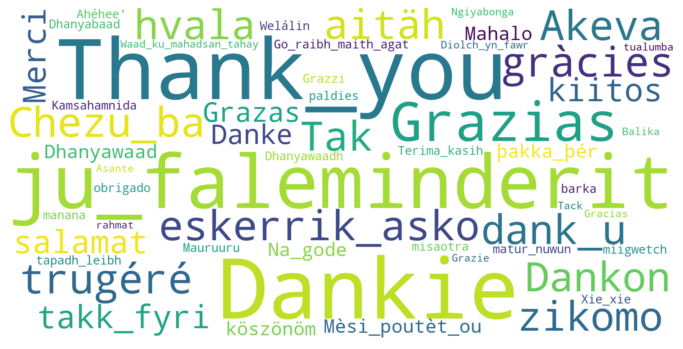

In [155]:
text = """Dankie,ju_faleminderit,Grazias,eskerrik_asko,trugéré,Akeva,Chezu_ba,gràcies,zikomo,hvala,Tak,dank_u,Dankon,aitäh,takk_fyri,salamat,kiitos,Merci,Grazas,Danke,Mèsi_poutèt_ou,Na_gode,Mahalo,Dhanyawaad,köszönöm,þakka_þér,Go_raibh_maith_agat,matur_nuwun,Kamsahamnida,Thank_you,paldies,misaotra,Terima_kasih,Grazzi,Xie_xie,Thank_you,Mauruuru,Dhanyawaadh,Welálin,barka,Ahéhee',Dhanyabaad,Thank_you,miigwetch,manana,obrigado,tapadh_leibh,Waad_ku_mahadsan_tahay,Gracias,Asante,Tack,rahmat,tualumba,Diolch_yn_fawr,Balika,Ngiyabonga,Grazie
"""

wordcloud = WordCloud(
    background_color = 'white',
    width = 1600, height = 800,
    max_font_size = 200,
    relative_scaling= 0
).generate(text)

plt.figure(figsize=(12,10))
plt.title(
    '',
    fontweight = 'bold',
    fontsize=30
)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents"><span class="toc-item-num">Jump back to <b>Table of Contents</b></a></span></li>